1.检查数据

In [ ]:
import os
import pandas as pd

# 设置文件夹路径
folder_path = r'./原始数据/附件2/脑电波数据'

# 初始化计数器
count_non_zero = 0

# 遍历文件夹中的文件
for i in range(1, 26):
    file_path = os.path.join(folder_path, f'A{i}.csv')
    if os.path.exists(file_path):
        try:
            # 对于 A3.csv 尝试使用 'utf-8' 编码读取
            if os.path.basename(file_path) == 'A3.csv':
                df = pd.read_csv(file_path, encoding='utf-8')
            else:
                # 尝试使用 'gbk' 编码读取文件
                df = pd.read_csv(file_path, encoding='gbk')
        except UnicodeDecodeError:
            print(f'文件 {file_path} 无法读取，请检查编码格式。')
            continue
        
        # 清理列名中的前后空格
        df.columns = df.columns.str.strip()
        
        # 确保列名正确
        if '脑电连接信号是否正常' not in df.columns:
            raise KeyError('脑电连接信号是否正常 列不存在，请检查文件中的列名')
        
        # 获取“脑电连接信号是否正常”列的索引
        column_index = df.columns.get_loc('脑电连接信号是否正常')
        
        # 统计“脑电连接信号是否正常”列中数据不为0的个数
        non_zero_count = (df['脑电连接信号是否正常'] != 0).sum()
        
        # 更新总计数
        count_non_zero += non_zero_count
        
        # 获取右边所有列的名称
        columns_to_modify = df.columns[column_index + 1:]
        
        # 修改右边的列数据
        df.loc[df['脑电连接信号是否正常'] != 0, columns_to_modify] = None
        
        # 打印每个文件的统计结果
        print(f'{os.path.basename(file_path)} 脑电连接信号是否正常列中数据不为0的个数是: {non_zero_count}')
        
        # 保存修改后的文件
        df.to_csv(file_path, index=False, encoding='utf-8' if os.path.basename(file_path) == 'A3.csv' else 'gbk')

# 打印总计数结果
print(f'脑电连接信号是否正常列中数据不为0的总个数是: {count_non_zero}')

A1.csv 脑电连接信号是否正常列中数据不为0的个数是: 2
A2.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
A3.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
A4.csv 脑电连接信号是否正常列中数据不为0的个数是: 1
A5.csv 脑电连接信号是否正常列中数据不为0的个数是: 3
A6.csv 脑电连接信号是否正常列中数据不为0的个数是: 4
A7.csv 脑电连接信号是否正常列中数据不为0的个数是: 2
A8.csv 脑电连接信号是否正常列中数据不为0的个数是: 3
A9.csv 脑电连接信号是否正常列中数据不为0的个数是: 32
A10.csv 脑电连接信号是否正常列中数据不为0的个数是: 1
A11.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
A12.csv 脑电连接信号是否正常列中数据不为0的个数是: 3
A13.csv 脑电连接信号是否正常列中数据不为0的个数是: 89
A14.csv 脑电连接信号是否正常列中数据不为0的个数是: 1
A15.csv 脑电连接信号是否正常列中数据不为0的个数是: 1
A16.csv 脑电连接信号是否正常列中数据不为0的个数是: 89
A17.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
A18.csv 脑电连接信号是否正常列中数据不为0的个数是: 21
A19.csv 脑电连接信号是否正常列中数据不为0的个数是: 52
A20.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
A21.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
A22.csv 脑电连接信号是否正常列中数据不为0的个数是: 29
A23.csv 脑电连接信号是否正常列中数据不为0的个数是: 63
A24.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
A25.csv 脑电连接信号是否正常列中数据不为0的个数是: 0
脑电连接信号是否正常列中数据不为0的总个数是: 396


插补前数据

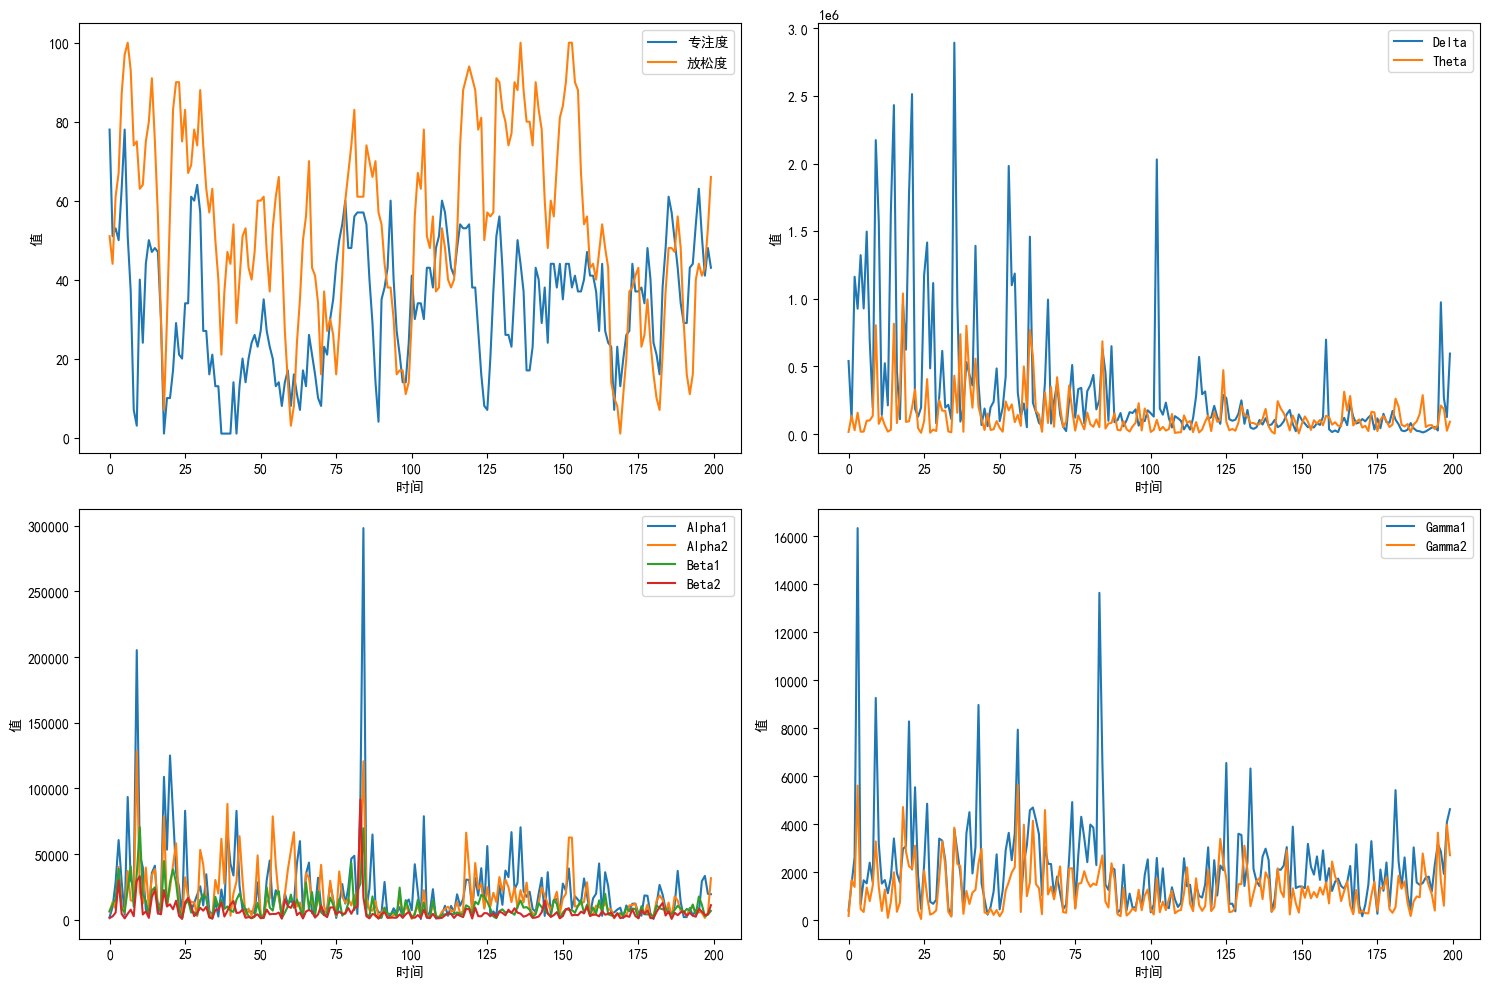

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件，假设文件编码为'gbk'
file_path = './原始数据/附件2/脑电波数据/A1.csv'
data = pd.read_csv(file_path, encoding='gbk')

# 设置字体，确保中文标签显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建一个画布，包含多个子图
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 第一个子图：第四列和第五列
axs[0, 0].plot(data.index, data.iloc[:, 3], label=data.columns[3])
axs[0, 0].plot(data.index, data.iloc[:, 4], label=data.columns[4])
axs[0, 0].set_xlabel('时间')
axs[0, 0].set_ylabel('值')
# axs[0, 0].set_title('第4列和第5列的时间序列数据')
axs[0, 0].legend()

# 第二个子图：第六列和第七列
axs[0, 1].plot(data.index, data.iloc[:, 5], label=data.columns[5])
axs[0, 1].plot(data.index, data.iloc[:, 6], label=data.columns[6])
axs[0, 1].set_xlabel('时间')
axs[0, 1].set_ylabel('值')
# axs[0, 1].set_title('第6列和第7列的时间序列数据')
axs[0, 1].legend()

# 第三个子图：第七列到第十列
axs[1, 0].plot(data.index, data.iloc[:, 7], label=data.columns[7])
axs[1, 0].plot(data.index, data.iloc[:, 8], label=data.columns[8])
axs[1, 0].plot(data.index, data.iloc[:, 9], label=data.columns[9])
axs[1, 0].plot(data.index, data.iloc[:, 10], label=data.columns[10])
axs[1, 0].set_xlabel('时间')
axs[1, 0].set_ylabel('值')
# axs[1, 0].set_title('第7列到第10列的时间序列数据')
axs[1, 0].legend()

# 第四个子图：第十一列和第十二列
axs[1, 1].plot(data.index, data.iloc[:, 11], label=data.columns[11])
axs[1, 1].plot(data.index, data.iloc[:, 12], label=data.columns[12])
axs[1, 1].set_xlabel('时间')
axs[1, 1].set_ylabel('值')
# axs[1, 1].set_title('第11列和第12列的时间序列数据')
axs[1, 1].legend()

# 调整布局并显示图形
plt.tight_layout()
plt.show()


2.缺失值处理：脑电连接信号不正常用多重插值

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import os

# 设置文件夹路径
folder_path = r'./处理后的数据/脑电波数据/'

# 遍历文件 A1.csv 到 A25.csv
for i in range(1, 26):
    file_name = f'A{i}.csv'
    input_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(input_path):
        # 根据文件名判断编码格式
        if file_name == 'A3.csv':
            encoding_format = 'utf-8'
        else:
            encoding_format = 'gbk'
        
        # 读取数据
        eeg_data = pd.read_csv(input_path, encoding=encoding_format)
        
        # 合并日期和时间列为时间戳
        eeg_data['timestamp'] = pd.to_datetime(eeg_data['日期'] + ' ' + eeg_data['时间'])
        eeg_data.set_index('timestamp', inplace=True)
        
        # 删除原始日期和时间列
        eeg_data.drop(columns=['日期', '时间'], inplace=True)
        
        # 检查插补前的缺失值
        missing_values_before = eeg_data.isna().sum()
        print(f"插补前缺失值情况（{file_name}）：")
        print(missing_values_before)
        
        # 初始化多重插补器
        imputed_datasets = []
        
        for j in range(5):
            # 深拷贝原始数据
            data_copy = eeg_data.copy()
            
            # 为缺失值部分添加轻微的随机噪声
            noise = np.random.normal(0, 1e-4, data_copy.shape)
            data_copy = data_copy.mask(data_copy.isna(), other=data_copy + noise)
            
            # 使用IterativeImputer进行多重插补
            imputer = IterativeImputer(max_iter=10, random_state=j)  # 设置不同的随机种子
            imputed_data = imputer.fit_transform(data_copy)
            
            # 转换为DataFrame
            imputed_df = pd.DataFrame(imputed_data, columns=eeg_data.columns, index=eeg_data.index)
            imputed_datasets.append(imputed_df)
        
        # 检查插补后的缺失值情况
        missing_values_after = imputed_datasets[0].isna().sum()
        print(f"插补后缺失值情况（{file_name}）：")
        print(missing_values_after)
        
        # 计算五个插补数据集的均值
        mean_imputed_data = pd.concat(imputed_datasets).groupby(level=0).mean()
        
        # 保存均值数据集为 B1.csv 到 B25.csv，编码格式为 'gbk'
        output_file_name = f'B{i}.csv'
        output_path = os.path.join(folder_path, output_file_name)
        mean_imputed_data.to_csv(output_path, index=True, encoding='gbk')
        
        print(f"多重插补和均值计算完成。最终数据集保存在 {output_file_name}")
    else:
        print(f"文件 {file_name} 不存在。")


插补前缺失值情况（A1.csv）：
脑电连接信号是否正常    0
专注度           2
放松            2
Delta         2
Theta         2
Alpha1        2
Alpha2        2
Beta1         2
Beta2         2
Gamma1        2
Gamma2        2
dtype: int64
插补后缺失值情况（A1.csv）：
脑电连接信号是否正常    0
专注度           0
放松            0
Delta         0
Theta         0
Alpha1        0
Alpha2        0
Beta1         0
Beta2         0
Gamma1        0
Gamma2        0
dtype: int64
多重插补和均值计算完成。最终数据集保存在 B1.csv
插补前缺失值情况（A2.csv）：
脑电连接信号是否正常    0
专注度           0
放松            0
Delta         0
Theta         0
Alpha1        0
Alpha2        0
Beta1         0
Beta2         0
Gamma1        0
Gamma2        0
dtype: int64
插补后缺失值情况（A2.csv）：
脑电连接信号是否正常    0
专注度           0
放松            0
Delta         0
Theta         0
Alpha1        0
Alpha2        0
Beta1         0
Beta2         0
Gamma1        0
Gamma2        0
dtype: int64
多重插补和均值计算完成。最终数据集保存在 B2.csv
插补前缺失值情况（A3.csv）：
脑电连接信号是否正常    0
专注度           0
放松度           0
Delta         0
Theta         0
Alpha1        0
Al

插值后数据

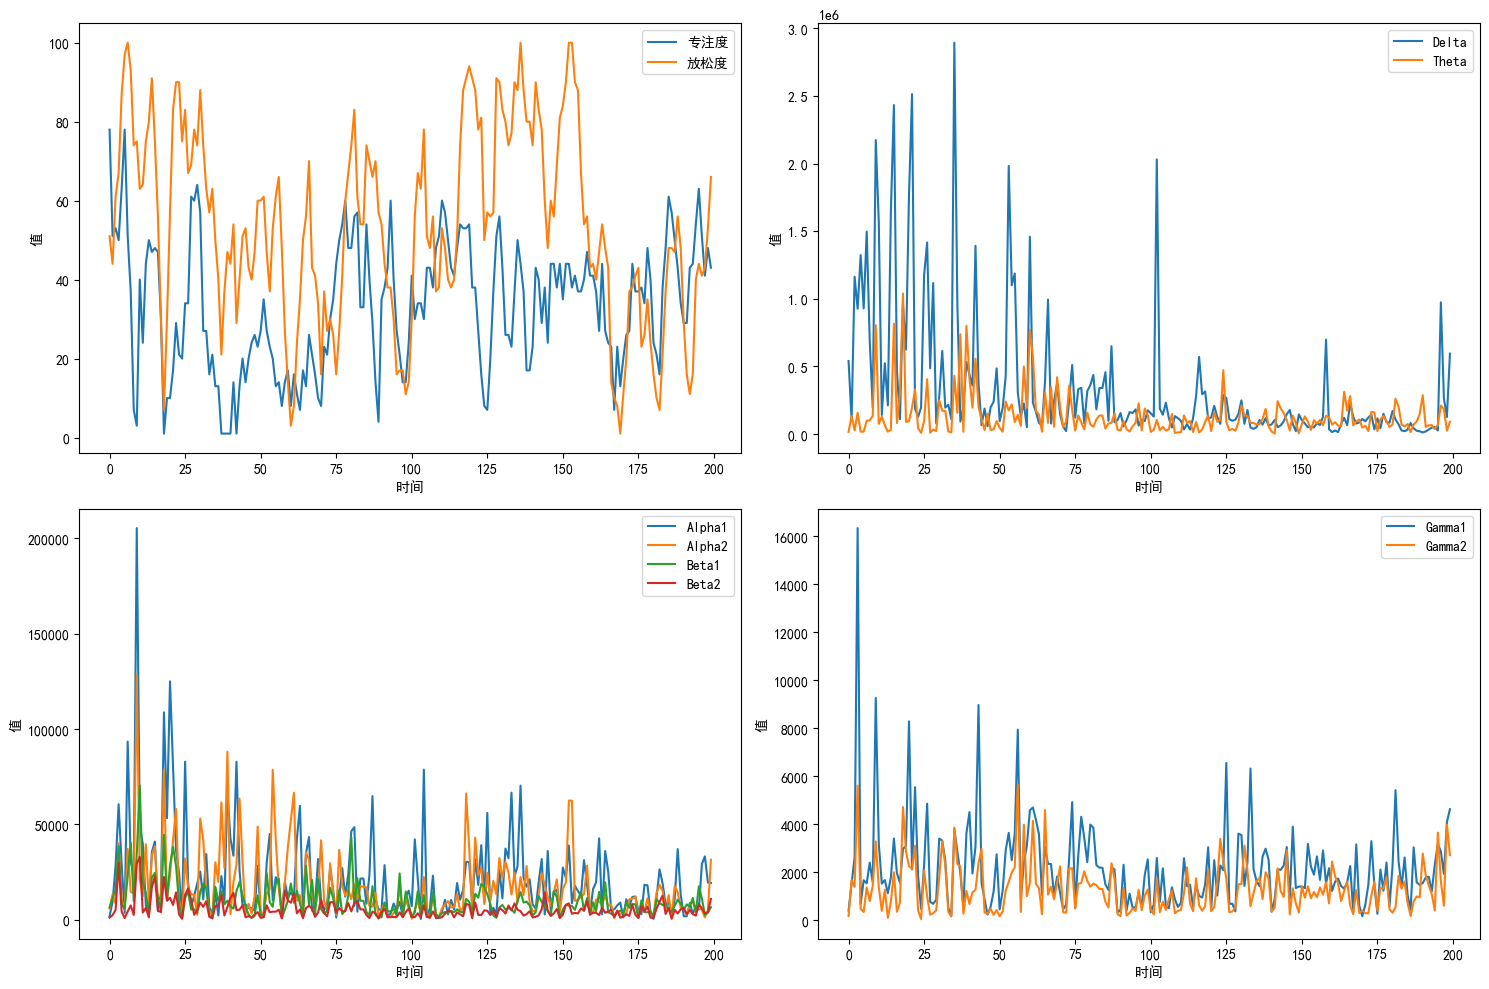

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件，假设文件编码为'gbk'
file_path = './处理后的数据/'
data = pd.read_csv(file_path, encoding='gbk')

# 设置字体，确保中文标签显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建一个画布，包含多个子图
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 第一个子图：第四列和第五列
axs[0, 0].plot(data.index, data.iloc[:, 2], label=data.columns[2])
axs[0, 0].plot(data.index, data.iloc[:, 3], label=data.columns[3])
axs[0, 0].set_xlabel('时间')
axs[0, 0].set_ylabel('值')
# axs[0, 0].set_title('第4列和第5列的时间序列数据')
axs[0, 0].legend()

# 第二个子图：第六列和第七列
axs[0, 1].plot(data.index, data.iloc[:, 4], label=data.columns[4])
axs[0, 1].plot(data.index, data.iloc[:, 5], label=data.columns[5])
axs[0, 1].set_xlabel('时间')
axs[0, 1].set_ylabel('值')
# axs[0, 1].set_title('第6列和第7列的时间序列数据')
axs[0, 1].legend()

# 第三个子图：第八列和第九列
axs[1, 0].plot(data.index, data.iloc[:, 6], label=data.columns[6])
axs[1, 0].plot(data.index, data.iloc[:, 7], label=data.columns[7])
axs[1, 0].plot(data.index, data.iloc[:, 8], label=data.columns[8])
axs[1, 0].plot(data.index, data.iloc[:, 9], label=data.columns[9])
axs[1, 0].set_xlabel('时间')
axs[1, 0].set_ylabel('值')
# axs[1, 0].set_title('第8列和第9列的时间序列数据')
axs[1, 0].legend()

# 第四个子图：第九列和第十列
axs[1, 1].plot(data.index, data.iloc[:, 10], label=data.columns[10])
axs[1, 1].plot(data.index, data.iloc[:, 11], label=data.columns[11])
axs[1, 1].set_xlabel('时间')
axs[1, 1].set_ylabel('值')
# axs[1, 1].set_title('第9列和第10列的时间序列数据')
axs[1, 1].legend()

# 调整布局并显示图形
plt.tight_layout()
plt.show()


2.1缺失值处理，前面缺失剔除，中间缺失均值填充，中间大块缺失

3.数据去噪，滤波器+ICA分离独立信号成分+小波变换

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

# 定义Butterworth滤波器
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# 处理文件夹中的每个文件
data_folder = './处理后的数据/脑电波数据1'
output_folder = './处理后的数据/处理后的数据1'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i, filename in enumerate(sorted(os.listdir(data_folder)), start=1):
    if filename.startswith('B') and filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        
        # 读取数据
        data = pd.read_csv(file_path, encoding='gbk')
        
        # 假设数据采样频率为250Hz
        fs = 250.0
        
        # 滤波器参数
        lowcut = 1.0
        highcut = 50.0
        
        # 对每个通道进行滤波（从第五列开始）
        filtered_data = data.copy()
        for column in data.columns[4:]:
            filtered_data[column] = butter_bandpass_filter(data[column], lowcut, highcut, fs)
        
        # 提取处理后的数据（保留前四列，从第五列开始处理）
        processed_df = filtered_data.copy()
        
        # 保存处理后的数据为C1-C25
        output_filename = f'C{i}.csv'
        output_file_path = os.path.join(output_folder, output_filename)
        processed_df.to_csv(output_file_path, index=False, encoding='gbk')

print("所有文件已处理并保存。")


所有文件已处理并保存。


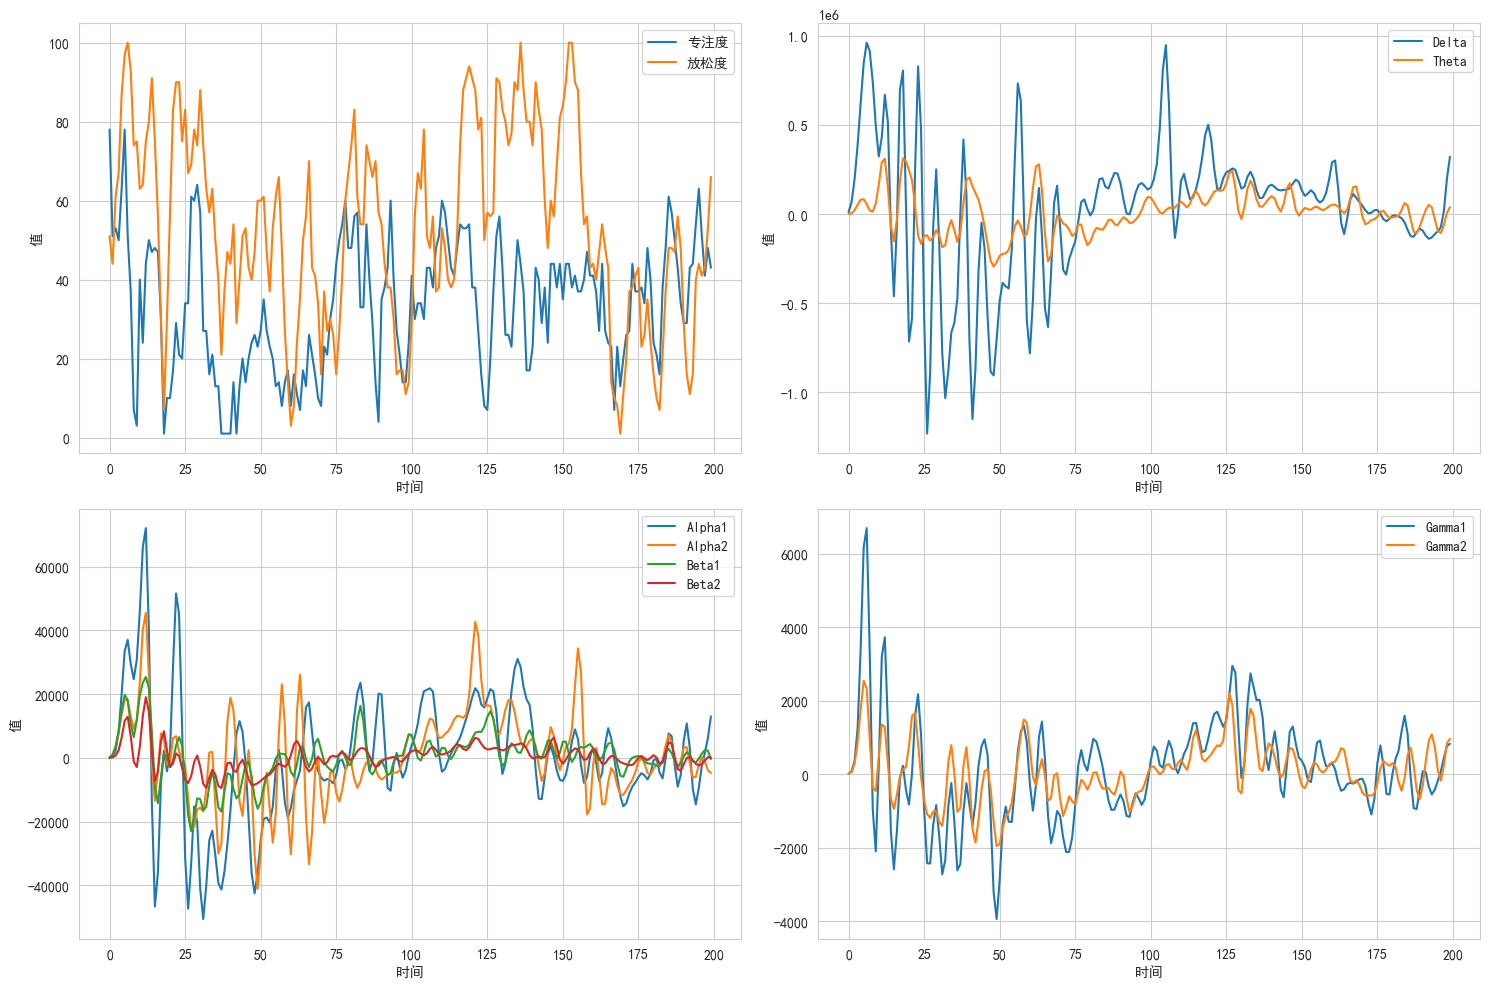

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件，假设文件编码为'gbk'
file_path = './处理后的数据/处理后的数据1/C1.csv'
data = pd.read_csv(file_path, encoding='gbk')

# 设置字体，确保中文标签显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建一个画布，包含多个子图
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 第一个子图：第四列和第五列
axs[0, 0].plot(data.index, data.iloc[:, 2], label=data.columns[2])
axs[0, 0].plot(data.index, data.iloc[:, 3], label=data.columns[3])
axs[0, 0].set_xlabel('时间')
axs[0, 0].set_ylabel('值')
# axs[0, 0].set_title('第4列和第5列的时间序列数据')
axs[0, 0].legend()

# 第二个子图：第六列和第七列
axs[0, 1].plot(data.index, data.iloc[:, 4], label=data.columns[4])
axs[0, 1].plot(data.index, data.iloc[:, 5], label=data.columns[5])
axs[0, 1].set_xlabel('时间')
axs[0, 1].set_ylabel('值')
# axs[0, 1].set_title('第6列和第7列的时间序列数据')
axs[0, 1].legend()

# 第三个子图：第八列和第九列
axs[1, 0].plot(data.index, data.iloc[:, 6], label=data.columns[6])
axs[1, 0].plot(data.index, data.iloc[:, 7], label=data.columns[7])
axs[1, 0].plot(data.index, data.iloc[:, 8], label=data.columns[8])
axs[1, 0].plot(data.index, data.iloc[:, 9], label=data.columns[9])
axs[1, 0].set_xlabel('时间')
axs[1, 0].set_ylabel('值')
# axs[1, 0].set_title('第8列和第9列的时间序列数据')
axs[1, 0].legend()

# 第四个子图：第九列和第十列
axs[1, 1].plot(data.index, data.iloc[:, 10], label=data.columns[10])
axs[1, 1].plot(data.index, data.iloc[:, 11], label=data.columns[11])
axs[1, 1].set_xlabel('时间')
axs[1, 1].set_ylabel('值')
# axs[1, 1].set_title('第9列和第10列的时间序列数据')
axs[1, 1].legend()

# 调整布局并显示图形
plt.tight_layout()
plt.show()



早期融合   随机森林+plm+svm +lofisric  均值、标准差、最大值、最小值

SVM Accuracy: 0.42857142857142855
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.25      0.50      0.33         2

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7


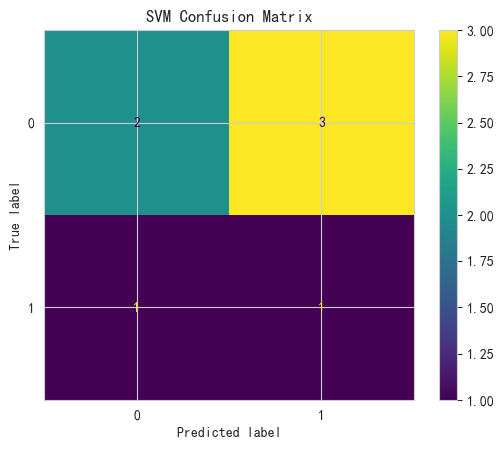

MLP Accuracy: 0.7142857142857143
MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7


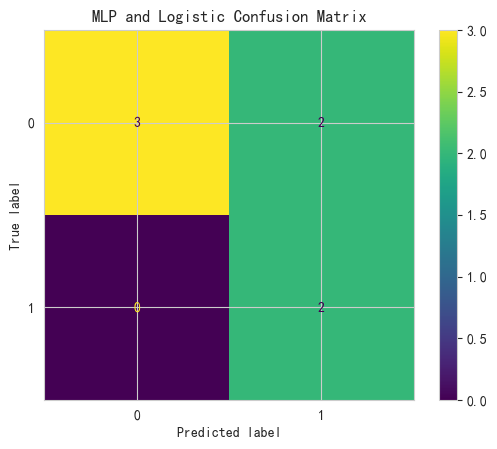

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7


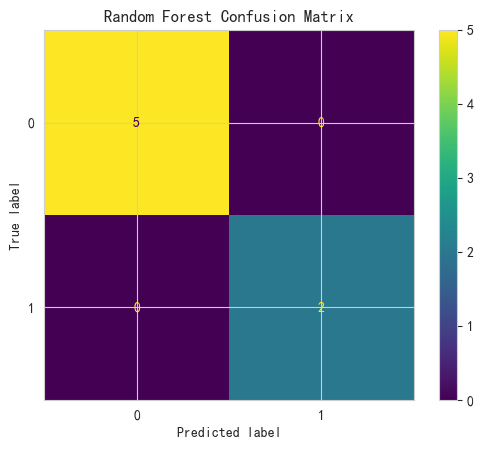

Logistic Regression Accuracy: 0.7142857142857143
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7


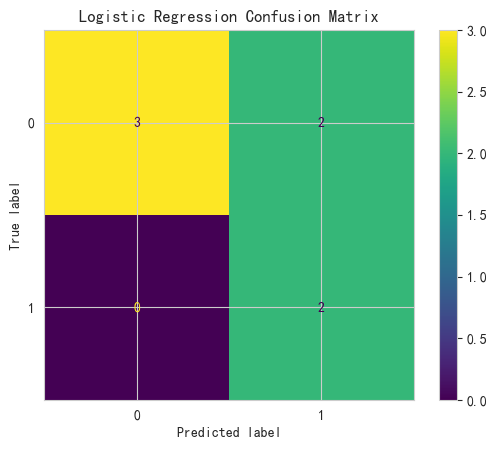

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 读取附件1.xlsx
data_path = './处理后的数据/附件1.xlsx'
data_df = pd.read_excel(data_path)

# 提取特征和标签
X_base = data_df.iloc[:, :-1]  # 前七列为特征
y = data_df.iloc[:, -1]  # 最后一列为标签

# 读取脑电波数据
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_features = []

for file in os.listdir(eeg_data_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(eeg_data_folder, file)
        try:
            eeg_df = pd.read_csv(file_path, encoding='latin1')  # 尝试使用不同的编码格式
        except UnicodeDecodeError:
            eeg_df = pd.read_csv(file_path, encoding='ISO-8859-1')  # 尝试另一种编码格式
        # 提取第三列到最后一列的特征
        eeg_feature_set = eeg_df.iloc[:, 2:12].apply(lambda x: [
            np.mean(x), 
            np.std(x), 
            np.max(x), 
            np.min(x), 
            skew(x), 
            kurtosis(x)
        ], axis=0).values.flatten()
        eeg_features.append(eeg_feature_set)

# 将eeg_features转换为DataFrame
eeg_features_df = pd.DataFrame(eeg_features)

# 合并所有特征
X = pd.concat([X_base.reset_index(drop=True), eeg_features_df.reset_index(drop=True)], axis=1)

# 将所有列名转换为字符串
X.columns = X.columns.astype(str)

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=42)

# 训练SVM模型
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 预测
y_pred_svm = svm_model.predict(X_test)

# 评估模型
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(report_svm)

# 计算并显示SVM混淆矩阵
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
disp_svm.plot()
plt.title('SVM Confusion Matrix')
plt.show()

# 训练MLP模型
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp_model.fit(X_train, y_train)

# 预测
y_pred_mlp = mlp_model.predict(X_test)

# 评估模型
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)

print(f"MLP Accuracy: {accuracy_mlp}")
print("MLP Classification Report:")
print(report_mlp)

# 计算并显示MLP混淆矩阵
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp)
disp_mlp.plot()
plt.title('MLP and Logistic Confusion Matrix')
plt.show()

# 训练随机森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)

# 评估模型
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)

# 计算并显示随机森林混淆矩阵
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# 训练逻辑回归模型
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# 预测
y_pred_logistic = logistic_model.predict(X_test)

# 评估模型
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print("Logistic Regression Classification Report:")
print(report_logistic)

# 计算并显示逻辑回归混淆矩阵
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic)
disp_logistic.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


中期融合  随机森林+logistic

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7


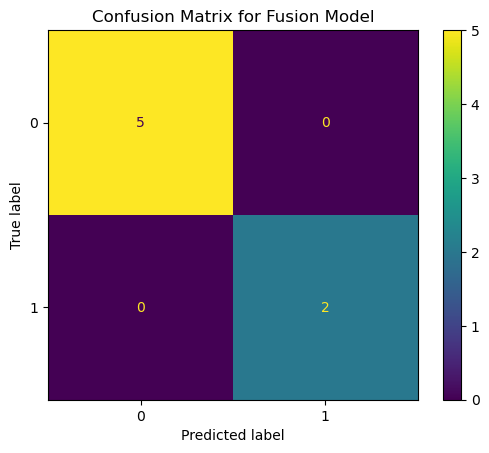

In [ ]:
# import pandas as pd
# import os
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# from scipy.stats import skew, kurtosis
# from sklearn.preprocessing import StandardScaler
# import chardet
# import matplotlib.pyplot as plt
# from sklearn.base import BaseEstimator, TransformerMixin
# 
# # 自定义特征提取转换器
# class FeatureExtractor(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
# 
#     def transform(self, X):
#         features = []
#         for column in X.columns:
#             col_data = X[column]
#             features.append(col_data.mean())
#             features.append(col_data.std())
#             features.append(col_data.max())
#             features.append(col_data.min())
#             features.append(skew(col_data))
#             features.append(kurtosis(col_data))
#         return np.array(features).reshape(1, -1)
# 
# # 自动检测文件编码并读取
# def read_file_with_detected_encoding(file_path):
#     with open(file_path, 'rb') as f:
#         result = chardet.detect(f.read())
#     encoding = result['encoding']
#     return pd.read_csv(file_path, encoding=encoding)
# 
# # 读取Excel数据
# data_path = './处理后的数据/附件1.xlsx'
# data = pd.read_excel(data_path)
# X_base = data.iloc[:, :-1]
# y = data.iloc[:, -1]
# 
# # 读取EEG数据并提取特征
# eeg_data_folder = './处理后的数据/脑电波数据1'
# eeg_files = os.listdir(eeg_data_folder)
# 
# eeg_features = []
# for file in eeg_files:
#     file_path = os.path.join(eeg_data_folder, file)
#     eeg_data = read_file_with_detected_encoding(file_path)
#     extractor = FeatureExtractor()
#     features = extractor.transform(eeg_data.iloc[:, 2:])
#     eeg_features.append(features)
# 
# eeg_features = np.vstack(eeg_features)
# 
# # 标准化数据
# scaler = StandardScaler()
# X_base_scaled = scaler.fit_transform(X_base)
# eeg_features_scaled = scaler.fit_transform(eeg_features)
# 
# # 分割数据
# X_train_base, X_test_base, X_train_eeg, X_test_eeg, y_train, y_test = train_test_split(X_base_scaled, eeg_features_scaled, y, test_size=0.35, random_state=42)
# 
# # 基本特征模型
# base_model = RandomForestClassifier(random_state=42)
# base_model.fit(X_train_base, y_train)
# base_train_preds = base_model.predict_proba(X_train_base)[:, 1]
# base_test_preds = base_model.predict_proba(X_test_base)[:, 1]
# 
# # EEG特征模型
# eeg_model = RandomForestClassifier(random_state=42)
# eeg_model.fit(X_train_eeg, y_train)
# eeg_train_preds = eeg_model.predict_proba(X_train_eeg)[:, 1]
# eeg_test_preds = eeg_model.predict_proba(X_test_eeg)[:, 1]
# 
# # 融合模型输入
# train_combined = np.vstack((base_train_preds, eeg_train_preds)).T
# test_combined = np.vstack((base_test_preds, eeg_test_preds)).T
# 
# # 融合模型
# fusion_model = LogisticRegression(random_state=42)
# fusion_model.fit(train_combined, y_train)
# 
# # 预测与评估
# y_pred = fusion_model.predict(test_combined)
# print(classification_report(y_test, y_pred))
# 
# # 计算并显示混淆矩阵
# conf_matrix = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
# disp.plot()
# plt.title('Confusion Matrix for Fusion Model')
# plt.show()

lstm+logist

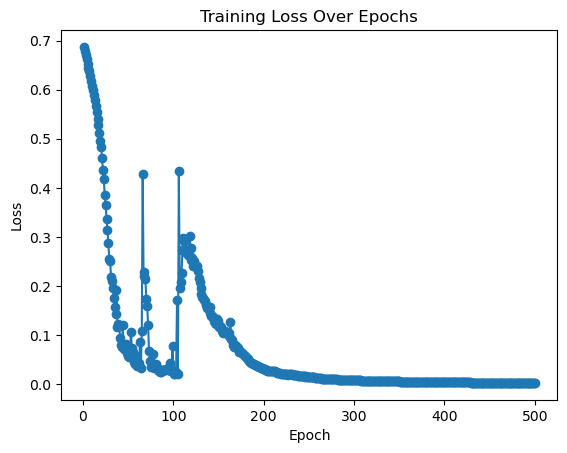

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7


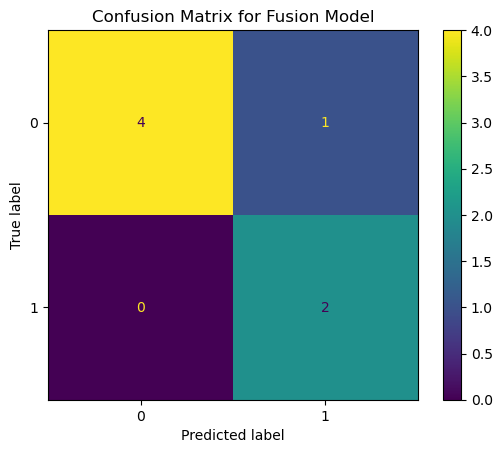

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import chardet

# 自动检测文件编码并读取
def read_file_with_detected_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    return pd.read_csv(file_path, encoding=encoding)

# 读取Excel数据
data_path = './处理后的数据/附件1.xlsx'
data = pd.read_excel(data_path)
X_base = data.iloc[:, :-1].values  # 将DataFrame转换为NumPy数组
y = data.iloc[:, -1].values  # 将DataFrame转换为NumPy数组

# 读取EEG数据并准备时间序列
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = os.listdir(eeg_data_folder)

eeg_data_list = []
min_length = float('inf')

# 首先确定最短的序列长度
for file in eeg_files:
    file_path = os.path.join(eeg_data_folder, file)
    eeg_data = read_file_with_detected_encoding(file_path)
    eeg_sequence = eeg_data.iloc[:, 2:12].values  # 使用第三列到第十二列
    if len(eeg_sequence) < min_length:
        min_length = len(eeg_sequence)

# 确保所有序列的长度一致（截断）
for file in eeg_files:
    file_path = os.path.join(eeg_data_folder, file)
    eeg_data = read_file_with_detected_encoding(file_path)
    eeg_sequence = eeg_data.iloc[:, 2:12].values  # 使用第三列到第十二列
    
    # 截断序列
    eeg_sequence = eeg_sequence[:min_length]
    
    eeg_data_list.append(eeg_sequence)

eeg_data_array = np.array(eeg_data_list)

# 构建RNN模型
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.hidden_size = hidden_size
        self.num_layers = num_layers

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# 构建基本特征的多层感知机模型
class BaseMLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BaseMLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 构建融合模型
class FusionModel(nn.Module):
    def __init__(self, input_size_base, hidden_size_base, output_size_base, input_size_rnn, hidden_size_rnn, num_layers_rnn, output_size_rnn, final_output_size):
        super(FusionModel, self).__init__()
        self.base_mlp_model = BaseMLPModel(input_size_base, hidden_size_base, output_size_base)
        self.rnn_model = RNNModel(input_size_rnn, hidden_size_rnn, num_layers_rnn, output_size_rnn)
        self.fc = nn.Linear(output_size_base + output_size_rnn, final_output_size)
    
    def forward(self, x_base, x_rnn):
        base_out = self.base_mlp_model(x_base)
        rnn_out = self.rnn_model(x_rnn)
        combined_out = torch.cat((base_out, rnn_out), dim=1)
        final_out = self.fc(combined_out)
        return final_out

# 处理标签
y = np.array(y)

# 分割数据
X_train_eeg, X_test_eeg, y_train, y_test = train_test_split(eeg_data_array, y, test_size=0.35, random_state=42)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.35, random_state=42)

# 将数据转换为Tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_eeg = torch.tensor(X_train_eeg, dtype=torch.float32).to(device)
X_test_eeg = torch.tensor(X_test_eeg, dtype=torch.float32).to(device)
X_train_base = torch.tensor(X_train_base, dtype=torch.float32).to(device)
X_test_base = torch.tensor(X_test_base, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# 初始化模型
input_size_base = X_train_base.shape[1]
hidden_size_base = 64
output_size_base = 32  # MLP输出的特征维度

input_size_rnn = X_train_eeg.shape[2]
hidden_size_rnn = 64
num_layers_rnn = 2
output_size_rnn = 32  # RNN输出的特征维度

final_output_size = 1  # 最终输出的维度，确保与标签维度一致

fusion_model = FusionModel(input_size_base, hidden_size_base, output_size_base, input_size_rnn, hidden_size_rnn, num_layers_rnn, output_size_rnn, final_output_size).to(device)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(fusion_model.parameters(), lr=0.001)

# 训练模型并记录损失值
num_epochs = 500
loss_values = []

for epoch in range(num_epochs):
    fusion_model.train()

    optimizer.zero_grad()

    outputs = fusion_model(X_train_base, X_train_eeg)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())
    # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 可视化损失函数
plt.figure()
plt.plot(range(1, num_epochs + 1), loss_values, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 提取训练和测试集的特征
fusion_model.eval()
with torch.no_grad():
    train_features = fusion_model(X_train_base, X_train_eeg).cpu().numpy()
    test_features = fusion_model(X_test_base, X_test_eeg).cpu().numpy()

# 数据标准化
scaler = StandardScaler()
train_combined_scaled = scaler.fit_transform(train_features)
test_combined_scaled = scaler.transform(test_features)

# 训练逻辑回归模型
fusion_lr_model = LogisticRegression(random_state=42)
fusion_lr_model.fit(train_combined_scaled, y_train.cpu().numpy())

# 预测与评估
y_pred = fusion_lr_model.predict(test_combined_scaled)
print(classification_report(y_test.cpu().numpy(), y_pred))

# 计算并显示混淆矩阵
conf_matrix = confusion_matrix(y_test.cpu().numpy(), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix for Fusion Model')
plt.show()


mlp+lstm+logistic

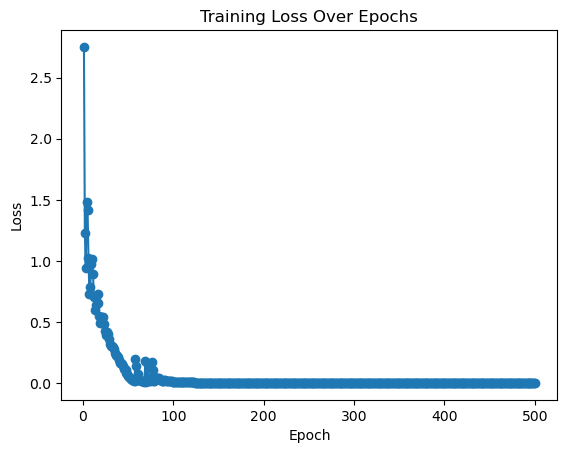

              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.25      0.50      0.33         2

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7


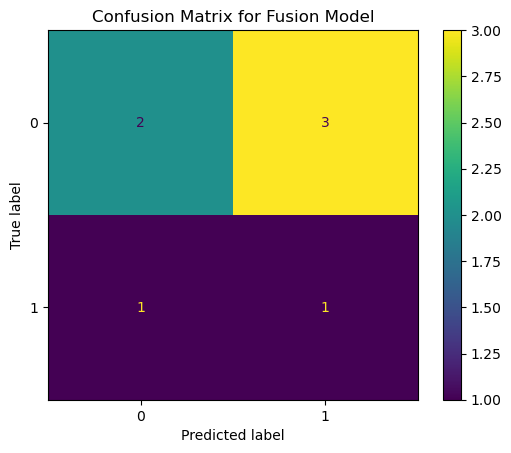

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import chardet

# 自动检测文件编码并读取
def read_file_with_detected_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    return pd.read_csv(file_path, encoding=encoding)

# 读取Excel数据
data_path = './处理后的数据/附件1.xlsx'
data = pd.read_excel(data_path)
X_base = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 读取EEG数据并准备时间序列
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = os.listdir(eeg_data_folder)

eeg_data_list = []
min_length = float('inf')

# 首先确定最短的序列长度
for file in eeg_files:
    file_path = os.path.join(eeg_data_folder, file)
    eeg_data = read_file_with_detected_encoding(file_path)
    eeg_sequence = eeg_data.iloc[:, 2:12].values  # 使用第三列到第十二列
    if len(eeg_sequence) < min_length:
        min_length = len(eeg_sequence)

# 确保所有序列的长度一致（截断）
for file in eeg_files:
    file_path = os.path.join(eeg_data_folder, file)
    eeg_data = read_file_with_detected_encoding(file_path)
    eeg_sequence = eeg_data.iloc[:, 2:12].values  # 使用第三列到第十二列
    
    # 截断序列
    eeg_sequence = eeg_sequence[:min_length]
    
    eeg_data_list.append(eeg_sequence)

eeg_data_array = np.array(eeg_data_list)

# 构建LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.hidden_size = hidden_size
        self.num_layers = num_layers

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 构建基本特征的神经网络模型
class BaseNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BaseNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 构建融合模型
class FusionModel(nn.Module):
    def __init__(self, input_size_base, hidden_size_base, output_size_base, input_size_lstm, hidden_size_lstm, num_layers_lstm, output_size_lstm, final_output_size):
        super(FusionModel, self).__init__()
        self.base_nn_model = BaseNNModel(input_size_base, hidden_size_base, output_size_base)
        self.lstm_model = LSTMModel(input_size_lstm, hidden_size_lstm, num_layers_lstm, output_size_lstm)
        self.fc = nn.Linear(output_size_base + output_size_lstm, final_output_size)
    
    def forward(self, x_base, x_lstm):
        base_out = self.base_nn_model(x_base)
        lstm_out = self.lstm_model(x_lstm)
        combined_out = torch.cat((base_out, lstm_out), dim=1)
        final_out = self.fc(combined_out)
        return final_out

# 处理标签
y_lstm = np.array(y)

# 分割数据
X_train_eeg, X_test_eeg, y_train, y_test = train_test_split(eeg_data_array, y_lstm, test_size=0.35, random_state=42)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.35, random_state=42)

# 将数据转换为Tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_eeg = torch.tensor(X_train_eeg, dtype=torch.float32).to(device)
X_test_eeg = torch.tensor(X_test_eeg, dtype=torch.float32).to(device)
X_train_base = torch.tensor(X_train_base.values, dtype=torch.float32).to(device)
X_test_base = torch.tensor(X_test_base.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# 初始化模型
input_size_base = X_train_base.shape[1]
hidden_size_base = 64
output_size_base = 32  # 神经网络输出的特征维度

input_size_lstm = X_train_eeg.shape[2]
hidden_size_lstm = 64
num_layers_lstm = 2
output_size_lstm = 32  # LSTM输出的特征维度

final_output_size = 1  # 最终输出的维度，确保与标签维度一致

fusion_model = FusionModel(input_size_base, hidden_size_base, output_size_base, input_size_lstm, hidden_size_lstm, num_layers_lstm, output_size_lstm, final_output_size).to(device)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(fusion_model.parameters(), lr=0.001)

# 训练模型并记录损失值
num_epochs = 500
loss_values = []

for epoch in range(num_epochs):
    fusion_model.train()

    optimizer.zero_grad()

    outputs = fusion_model(X_train_base, X_train_eeg)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())
    # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 可视化损失函数
plt.figure()
plt.plot(range(1, num_epochs + 1), loss_values, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 提取训练和测试集的特征
fusion_model.eval()
with torch.no_grad():
    train_features = fusion_model(X_train_base, X_train_eeg).cpu().numpy()
    test_features = fusion_model(X_test_base, X_test_eeg).cpu().numpy()

# 数据标准化
scaler = StandardScaler()
train_combined_scaled = scaler.fit_transform(train_features)
test_combined_scaled = scaler.transform(test_features)

# 训练融合模型
fusion_lr_model = LogisticRegression(random_state=42)
fusion_lr_model.fit(train_combined_scaled, y_train.cpu().numpy())

# 预测与评估
y_pred = fusion_lr_model.predict(test_combined_scaled)
print(classification_report(y_test.cpu().numpy(), y_pred))

# 计算并显示混淆矩阵
conf_matrix = confusion_matrix(y_test.cpu().numpy(), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix for Fusion Model')
plt.show()


mlp+GRU+logistic

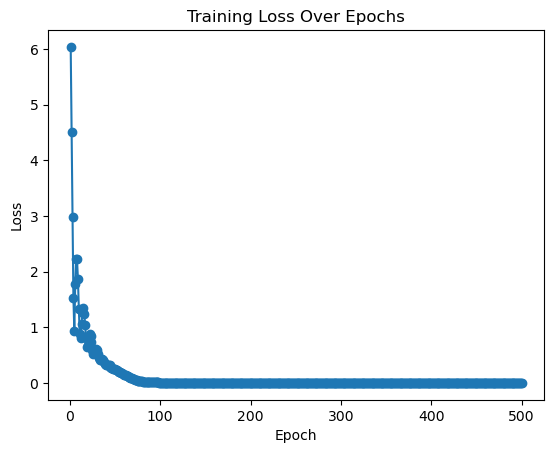

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7


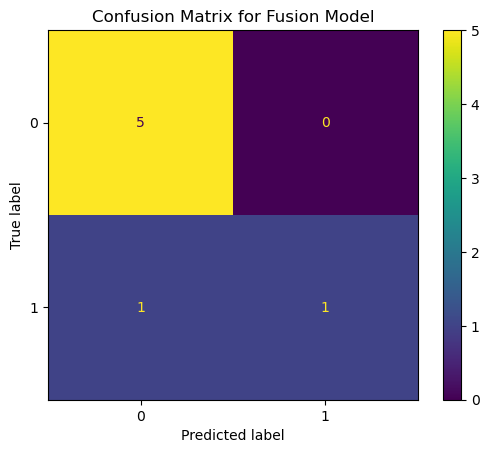

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import chardet

# 自动检测文件编码并读取
def read_file_with_detected_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    return pd.read_csv(file_path, encoding=encoding)

# 读取Excel数据
data_path = './处理后的数据/附件1.xlsx'
data = pd.read_excel(data_path)
X_base = data.iloc[:, :-1].values  # 将DataFrame转换为NumPy数组
y = data.iloc[:, -1].values  # 将DataFrame转换为NumPy数组

# 读取EEG数据并准备时间序列
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = os.listdir(eeg_data_folder)

eeg_data_list = []
min_length = float('inf')

# 首先确定最短的序列长度
for file in eeg_files:
    file_path = os.path.join(eeg_data_folder, file)
    eeg_data = read_file_with_detected_encoding(file_path)
    eeg_sequence = eeg_data.iloc[:, 2:12].values  # 使用第三列到第十二列
    if len(eeg_sequence) < min_length:
        min_length = len(eeg_sequence)

# 确保所有序列的长度一致（截断）
for file in eeg_files:
    file_path = os.path.join(eeg_data_folder, file)
    eeg_data = read_file_with_detected_encoding(file_path)
    eeg_sequence = eeg_data.iloc[:, 2:12].values  # 使用第三列到第十二列
    
    # 截断序列
    eeg_sequence = eeg_sequence[:min_length]
    
    eeg_data_list.append(eeg_sequence)

eeg_data_array = np.array(eeg_data_list)

# 构建GRU模型
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.hidden_size = hidden_size
        self.num_layers = num_layers

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# 构建基本特征的多层感知机模型
class BaseMLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BaseMLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 构建融合模型
class FusionModel(nn.Module):
    def __init__(self, input_size_base, hidden_size_base, output_size_base, input_size_gru, hidden_size_gru, num_layers_gru, output_size_gru, final_output_size):
        super(FusionModel, self).__init__()
        self.base_mlp_model = BaseMLPModel(input_size_base, hidden_size_base, output_size_base)
        self.gru_model = GRUModel(input_size_gru, hidden_size_gru, num_layers_gru, output_size_gru)
        self.fc = nn.Linear(output_size_base + output_size_gru, final_output_size)
    
    def forward(self, x_base, x_gru):
        base_out = self.base_mlp_model(x_base)
        gru_out = self.gru_model(x_gru)
        combined_out = torch.cat((base_out, gru_out), dim=1)
        final_out = self.fc(combined_out)
        return final_out

# 处理标签
y_lstm = np.array(y)

# 分割数据
X_train_eeg, X_test_eeg, y_train, y_test = train_test_split(eeg_data_array, y_lstm, test_size=0.35, random_state=42)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.35, random_state=42)

# 将数据转换为Tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_eeg = torch.tensor(X_train_eeg, dtype=torch.float32).to(device)
X_test_eeg = torch.tensor(X_test_eeg, dtype=torch.float32).to(device)
X_train_base = torch.tensor(X_train_base, dtype=torch.float32).to(device)
X_test_base = torch.tensor(X_test_base, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# 初始化模型
input_size_base = X_train_base.shape[1]
hidden_size_base = 64
output_size_base = 32  # MLP输出的特征维度

input_size_gru = X_train_eeg.shape[2]
hidden_size_gru = 64
num_layers_gru = 2
output_size_gru = 32  # GRU输出的特征维度

final_output_size = 1  # 最终输出的维度，确保与标签维度一致

fusion_model = FusionModel(input_size_base, hidden_size_base, output_size_base, input_size_gru, hidden_size_gru, num_layers_gru, output_size_gru, final_output_size).to(device)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(fusion_model.parameters(), lr=0.001)

# 训练模型并记录损失值
num_epochs = 500
loss_values = []

for epoch in range(num_epochs):
    fusion_model.train()

    optimizer.zero_grad()

    outputs = fusion_model(X_train_base, X_train_eeg)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())
    # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 可视化损失函数
plt.figure()
plt.plot(range(1, num_epochs + 1), loss_values, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 提取训练和测试集的特征
fusion_model.eval()
with torch.no_grad():
    train_features = fusion_model(X_train_base, X_train_eeg).cpu().numpy()
    test_features = fusion_model(X_test_base, X_test_eeg).cpu().numpy()

# 数据标准化
scaler = StandardScaler()
train_combined_scaled = scaler.fit_transform(train_features)
test_combined_scaled = scaler.transform(test_features)

# 训练融合模型
fusion_lr_model = LogisticRegression(random_state=42)
fusion_lr_model.fit(train_combined_scaled, y_train.cpu().numpy())

# 预测与评估
y_pred = fusion_lr_model.predict(test_combined_scaled)
print(classification_report(y_test.cpu().numpy(), y_pred))

# 计算并显示混淆矩阵
conf_matrix = confusion_matrix(y_test.cpu().numpy(), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix for Fusion Model')
plt.show()


In [ ]:
晚期融合   logistic+cnn

Weighted Average Fusion Model Accuracy: 0.42857142857142855
Confusion Matrix:
[[1 4]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.33      1.00      0.50         2

    accuracy                           0.43         7
   macro avg       0.67      0.60      0.42         7
weighted avg       0.81      0.43      0.38         7

Hard Voting Fusion Model Accuracy: 0.5714285714285714
Confusion Matrix:
[[4 1]
 [2 0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.33      0.40      0.36         7
weighted avg       0.48      0.57      0.52         7

Soft Voting Fusion Model Accuracy: 0.42857142857142855
Confusion Matrix:
[[1 4]
 [0 2]]

Classification Report:
      

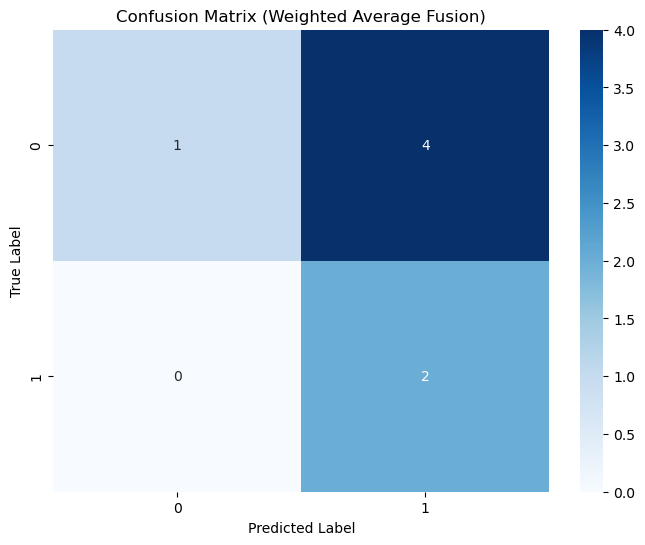

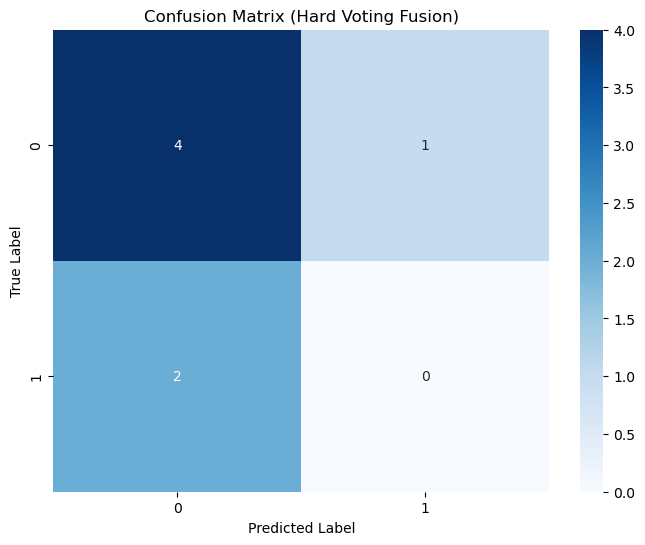

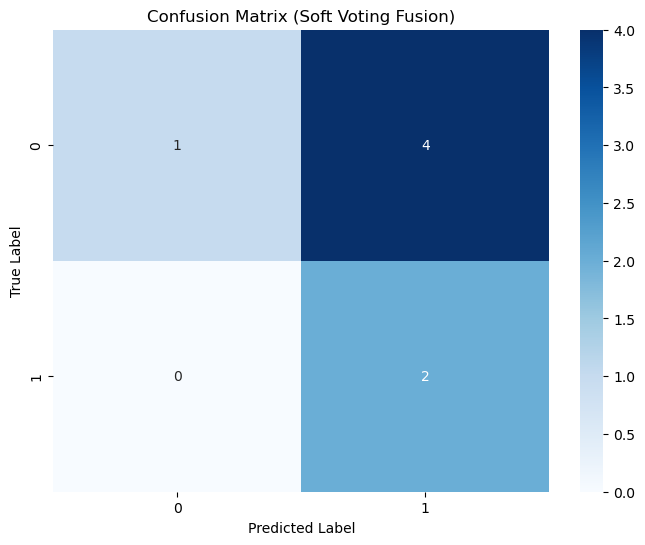

In [ ]:
import pandas as pd
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# 读取基本特征数据和标签
data_path = './处理后的数据/附件1.xlsx'
df = pd.read_excel(data_path)

# 分离特征和标签
X_basic = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 读取脑电波数据
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = sorted([os.path.join(eeg_data_folder, f) for f in os.listdir(eeg_data_folder) if f.endswith('.csv')])

# 初始化一个空的列表来存储所有的时间序列数据
eeg_data = []

for file in eeg_files:
    eeg_df = pd.read_csv(file, encoding='latin1')  # 尝试不同的编码格式，如'latin1'或'gbk'
    eeg_data.append(eeg_df.iloc[:, 2:].values)

# 确保所有的时间序列数据形状一致（最短截断）
min_length = min([eeg.shape[0] for eeg in eeg_data])

# 截断所有时间序列数据以确保形状一致
eeg_data_truncated = []

for eeg in eeg_data:
    eeg_truncated = eeg[:min_length, :]
    eeg_data_truncated.append(eeg_truncated)

X_eeg = np.array(eeg_data_truncated)

# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, X_basic, X_eeg, y):
        self.X_basic = torch.tensor(X_basic, dtype=torch.float32)
        self.X_eeg = torch.tensor(X_eeg, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X_basic[idx], self.X_eeg[idx], self.y[idx]

# 创建数据集
dataset = CustomDataset(X_basic, X_eeg, y)

# 拆分数据集
train_size = int(0.65 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义逻辑回归模型
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x

# 定义脑电波数据模型
class EEGModel(nn.Module):
    def __init__(self, input_dim, sequence_length):
        super(EEGModel, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, 64, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        conv_output_size = self._get_conv_output_size(sequence_length)
        self.fc1 = nn.Linear(conv_output_size, 32)
        self.fc2 = nn.Linear(32, 1)
    
    def _get_conv_output_size(self, sequence_length):
        # 计算卷积层后的输出大小
        def conv1d_size_out(size, kernel_size=3, stride=1, padding=0):
            return (size + 2 * padding - (kernel_size - 1) - 1) // stride + 1
        
        size = sequence_length
        size = conv1d_size_out(size, 3)
        size = size // 2  # maxpool1d
        size = conv1d_size_out(size, 3)
        size = size // 2  # maxpool1d
        return size * 128  # times the number of output channels
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

input_dim_basic = X_basic.shape[1]
input_dim_eeg = X_eeg.shape[2]
sequence_length = X_eeg.shape[1]

basic_model = LogisticRegressionModel(input_dim_basic)
eeg_model = EEGModel(input_dim_eeg, sequence_length)

# 损失函数和优化器
criterion = nn.BCELoss()
optimizer_basic = optim.Adam(basic_model.parameters(), lr=0.001)
optimizer_eeg = optim.Adam(eeg_model.parameters(), lr=0.001)

num_epochs = 500

# 训练逻辑回归模型
for epoch in range(num_epochs):
    basic_model.train()
    running_loss = 0.0
    for X_basic_batch, _, y_batch in train_loader:
        optimizer_basic.zero_grad()
        outputs = basic_model(X_basic_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_basic.step()
        running_loss += loss.item()

# 训练脑电波数据模型
for epoch in range(num_epochs):
    eeg_model.train()
    running_loss = 0.0
    for _, X_eeg_batch, y_batch in train_loader:
        X_eeg_batch = X_eeg_batch.permute(0, 2, 1)  # Change shape to (batch_size, channels, sequence_length)
        optimizer_eeg.zero_grad()
        outputs = eeg_model(X_eeg_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_eeg.step()
        running_loss += loss.item()

# 晚期融合
basic_model.eval()
eeg_model.eval()

basic_preds = []
eeg_preds = []
true_labels = []

with torch.no_grad():
    for X_basic_batch, X_eeg_batch, y_batch in test_loader:
        basic_output = basic_model(X_basic_batch).squeeze().numpy()
        X_eeg_batch = X_eeg_batch.permute(0, 2, 1)
        eeg_output = eeg_model(X_eeg_batch).squeeze().numpy()
        
        basic_preds.extend(basic_output)
        eeg_preds.extend(eeg_output)
        true_labels.extend(y_batch.numpy())

# 转换为 numpy 数组
basic_preds = np.array(basic_preds)
eeg_preds = np.array(eeg_preds)
true_labels = np.array(true_labels)

# 将预测结果从概率转换为二进制标签
basic_preds_binary = (basic_preds > 0.5).astype(int)
eeg_preds_binary = (eeg_preds > 0.5).astype(int)

# 加权平均融合
fused_preds_weighted = (basic_preds + eeg_preds) / 2
fused_preds_weighted_binary = (fused_preds_weighted > 0.5).astype(int)

# 硬投票融合
fused_preds_hard = basic_preds_binary + eeg_preds_binary
fused_preds_hard = (fused_preds_hard > 1).astype(int)

# 软投票融合
fused_preds_soft = (basic_preds + eeg_preds) / 2
fused_preds_soft_binary = (fused_preds_soft > 0.5).astype(int)

# 计算准确率和生成报告
def evaluate_fusion(true_labels, fused_preds_binary, method):
    accuracy = accuracy_score(true_labels, fused_preds_binary)
    conf_matrix = confusion_matrix(true_labels, fused_preds_binary)
    class_report = classification_report(true_labels, fused_preds_binary)
    print(f"{method} Fusion Model Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    return accuracy, conf_matrix, class_report

# 加权平均融合结果
_, conf_matrix_weighted, _ = evaluate_fusion(true_labels, fused_preds_weighted_binary, "Weighted Average")

# 硬投票融合结果
_, conf_matrix_hard, _ = evaluate_fusion(true_labels, fused_preds_hard, "Hard Voting")

# 软投票融合结果
_, conf_matrix_soft, _ = evaluate_fusion(true_labels, fused_preds_soft_binary, "Soft Voting")

# 绘制混淆矩阵
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# 绘制加权平均融合的混淆矩阵
plot_confusion_matrix(conf_matrix_weighted, "Confusion Matrix (Weighted Average Fusion)")

# 绘制硬投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_hard, "Confusion Matrix (Hard Voting Fusion)")

# 绘制软投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_soft, "Confusion Matrix (Soft Voting Fusion)")


In [ ]:
mlp+gru

Epoch 1, Basic Model Loss: 3.7530062198638916
Epoch 2, Basic Model Loss: 2.971604347229004
Epoch 3, Basic Model Loss: 2.1914360523223877
Epoch 4, Basic Model Loss: 1.420145869255066
Epoch 5, Basic Model Loss: 0.7278077602386475
Epoch 6, Basic Model Loss: 0.44984105229377747
Epoch 7, Basic Model Loss: 0.8740278482437134
Epoch 8, Basic Model Loss: 1.2293850183486938
Epoch 9, Basic Model Loss: 1.2395339012145996
Epoch 10, Basic Model Loss: 1.0115970373153687
Epoch 11, Basic Model Loss: 0.6959421038627625
Epoch 12, Basic Model Loss: 0.4599602520465851
Epoch 13, Basic Model Loss: 0.4054763615131378
Epoch 14, Basic Model Loss: 0.4859636425971985
Epoch 15, Basic Model Loss: 0.5964297652244568
Epoch 16, Basic Model Loss: 0.6710598468780518
Epoch 17, Basic Model Loss: 0.6877747178077698
Epoch 18, Basic Model Loss: 0.6481920480728149
Epoch 19, Basic Model Loss: 0.5669284462928772
Epoch 20, Basic Model Loss: 0.4682381749153137
Epoch 21, Basic Model Loss: 0.3827820122241974
Epoch 22, Basic Model L

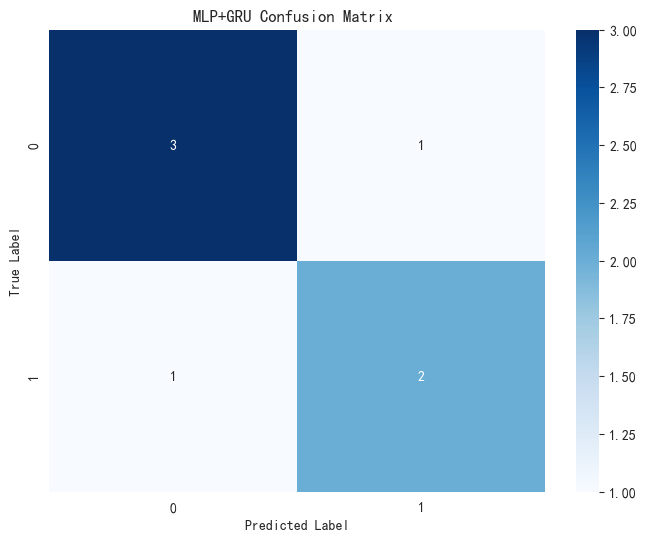

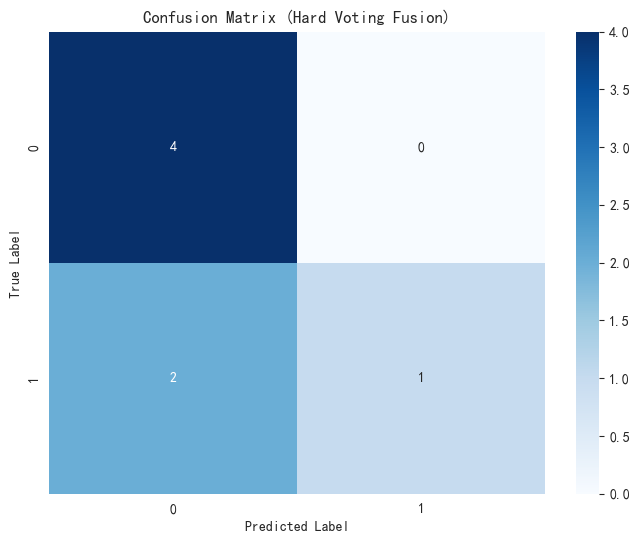

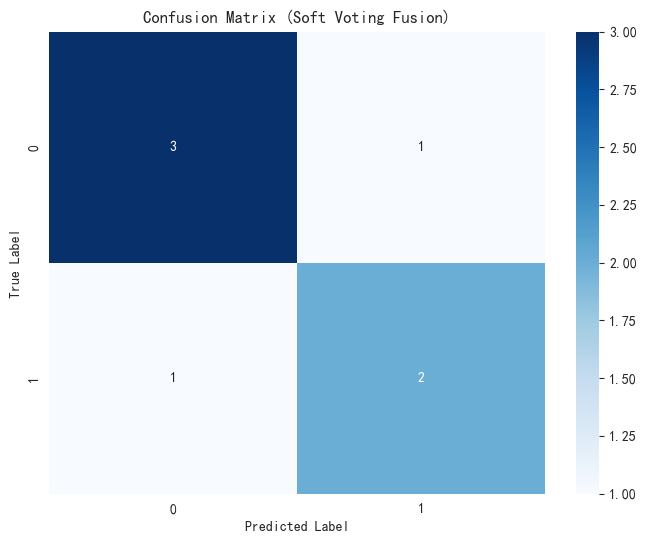

In [ ]:
import pandas as pd
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 读取基本特征数据和标签
data_path = './处理后的数据/附件1.xlsx'
df = pd.read_excel(data_path)

# 分离特征和标签
X_basic = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 读取脑电波数据
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = sorted([os.path.join(eeg_data_folder, f) for f in os.listdir(eeg_data_folder) if f.endswith('.csv')])

# 初始化一个空的列表来存储所有的时间序列数据
eeg_data = []

for file in eeg_files:
    eeg_df = pd.read_csv(file, encoding='latin1')  # 尝试不同的编码格式，如'latin1'或'gbk'
    eeg_data.append(eeg_df.iloc[:, 2:].values)

# 确保所有的时间序列数据形状一致（最短截断）
min_length = min([eeg.shape[0] for eeg in eeg_data])

# 截断所有时间序列数据以确保形状一致
eeg_data_truncated = []

for eeg in eeg_data:
    eeg_truncated = eeg[:min_length, :]
    eeg_data_truncated.append(eeg_truncated)

X_eeg = np.array(eeg_data_truncated)

# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, X_basic, X_eeg, y):
        self.X_basic = torch.tensor(X_basic, dtype=torch.float32)
        self.X_eeg = torch.tensor(X_eeg, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X_basic[idx], self.X_eeg[idx], self.y[idx]

# 创建数据集
dataset = CustomDataset(X_basic, X_eeg, y)

# 拆分数据集
train_size = int(0.65 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义基本特征模型（MLP）
class BasicFeatureModel(nn.Module):
    def __init__(self, input_dim):
        super(BasicFeatureModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# 定义GRU模型
class EEGModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers):
        super(EEGModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(self.gru.num_layers, x.size(0), self.gru.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        out = torch.sigmoid(out)
        return out

input_dim_basic = X_basic.shape[1]
input_dim_eeg = X_eeg.shape[2]
hidden_dim = 128
output_dim = 1
n_layers = 2

basic_model = BasicFeatureModel(input_dim_basic)
eeg_model = EEGModel(input_dim_eeg, hidden_dim, output_dim, n_layers)

# 损失函数和优化器
criterion = nn.BCELoss()
optimizer_basic = optim.Adam(basic_model.parameters(), lr=0.001)
optimizer_eeg = optim.Adam(eeg_model.parameters(), lr=0.001)

num_epochs = 500

# 训练基本特征模型（MLP）
for epoch in range(num_epochs):
    basic_model.train()
    running_loss = 0.0
    for X_basic_batch, _, y_batch in train_loader:
        optimizer_basic.zero_grad()
        outputs = basic_model(X_basic_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_basic.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Basic Model Loss: {running_loss/len(train_loader)}')

# 训练GRU模型
for epoch in range(num_epochs):
    eeg_model.train()
    running_loss = 0.0
    for _, X_eeg_batch, y_batch in train_loader:
        optimizer_eeg.zero_grad()
        outputs = eeg_model(X_eeg_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_eeg.step()
        running_loss += loss.item()
    # print(f'Epoch {epoch+1}, EEG Model Loss: {running_loss/len(train_loader)}')

# 晚期融合
basic_model.eval()
eeg_model.eval()

basic_preds = []
eeg_preds = []
true_labels = []

with torch.no_grad():
    for X_basic_batch, X_eeg_batch, y_batch in test_loader:
        basic_output = basic_model(X_basic_batch).squeeze().numpy()
        eeg_output = eeg_model(X_eeg_batch).squeeze().numpy()
        
        basic_preds.extend(basic_output)
        eeg_preds.extend(eeg_output)
        true_labels.extend(y_batch.numpy())

# 转换为 numpy 数组
basic_preds = np.array(basic_preds)
eeg_preds = np.array(eeg_preds)
true_labels = np.array(true_labels)

# 将预测结果从概率转换为二进制标签
basic_preds_binary = (basic_preds > 0.5).astype(int)
eeg_preds_binary = (eeg_preds > 0.5).astype(int)

# 加权平均融合
fused_preds_weighted = (basic_preds + eeg_preds) / 2
fused_preds_weighted_binary = (fused_preds_weighted > 0.5).astype(int)

# 硬投票融合
fused_preds_hard = basic_preds_binary + eeg_preds_binary
fused_preds_hard = (fused_preds_hard > 1).astype(int)

# 软投票融合
fused_preds_soft = (basic_preds + eeg_preds) / 2
fused_preds_soft_binary = (fused_preds_soft > 0.5).astype(int)

# 计算准确率和生成报告
def evaluate_fusion(true_labels, fused_preds_binary, method):
    accuracy = accuracy_score(true_labels, fused_preds_binary)
    conf_matrix = confusion_matrix(true_labels, fused_preds_binary)
    class_report = classification_report(true_labels, fused_preds_binary)
    print(f"{method} Fusion Model Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    return accuracy, conf_matrix, class_report

# 加权平均融合结果
_, conf_matrix_weighted, _ = evaluate_fusion(true_labels, fused_preds_weighted_binary, "Weighted Average")

# 硬投票融合结果
_, conf_matrix_hard, _ = evaluate_fusion(true_labels, fused_preds_hard, "Hard Voting")

# 软投票融合结果
_, conf_matrix_soft, _ = evaluate_fusion(true_labels, fused_preds_soft_binary, "Soft Voting")

# 绘制混淆矩阵
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# 绘制加权平均融合的混淆矩阵
plot_confusion_matrix(conf_matrix_weighted, "MLP+GRU Confusion Matrix ")

# 绘制硬投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_hard, "Confusion Matrix (Hard Voting Fusion)")

# 绘制软投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_soft, "Confusion Matrix (Soft Voting Fusion)")


In [ ]:
mlp+cnn

Epoch 1, Basic Model Loss: 3.563326120376587
Epoch 2, Basic Model Loss: 1.4493545293807983
Epoch 3, Basic Model Loss: 1.4506888389587402
Epoch 4, Basic Model Loss: 1.8631309270858765
Epoch 5, Basic Model Loss: 1.9092236757278442
Epoch 6, Basic Model Loss: 1.6798248291015625
Epoch 7, Basic Model Loss: 1.29740571975708
Epoch 8, Basic Model Loss: 0.9370877742767334
Epoch 9, Basic Model Loss: 0.8410719037055969
Epoch 10, Basic Model Loss: 1.0587283372879028
Epoch 11, Basic Model Loss: 1.2036075592041016
Epoch 12, Basic Model Loss: 1.1015183925628662
Epoch 13, Basic Model Loss: 0.8672889471054077
Epoch 14, Basic Model Loss: 0.7130804061889648
Epoch 15, Basic Model Loss: 0.7290073037147522
Epoch 16, Basic Model Loss: 0.8125150203704834
Epoch 17, Basic Model Loss: 0.8544981479644775
Epoch 18, Basic Model Loss: 0.8196899890899658
Epoch 19, Basic Model Loss: 0.7242695093154907
Epoch 20, Basic Model Loss: 0.616385817527771
Epoch 21, Basic Model Loss: 0.5590196847915649
Epoch 22, Basic Model Loss

C:\Users\ZT\.conda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZT\.conda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZT\.conda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZT\.conda\envs\python3

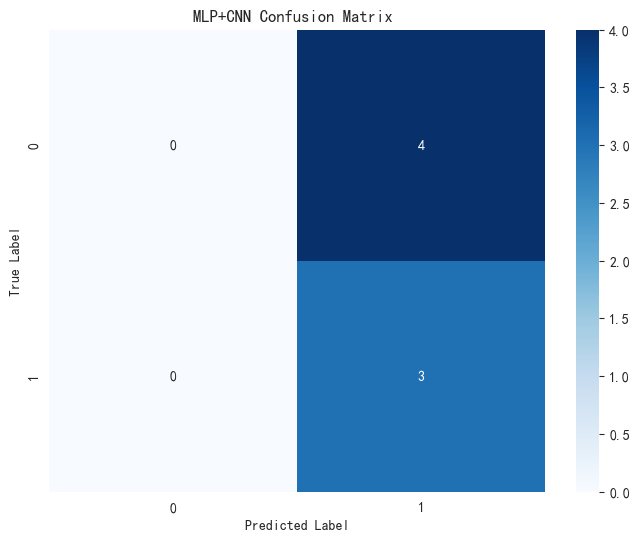

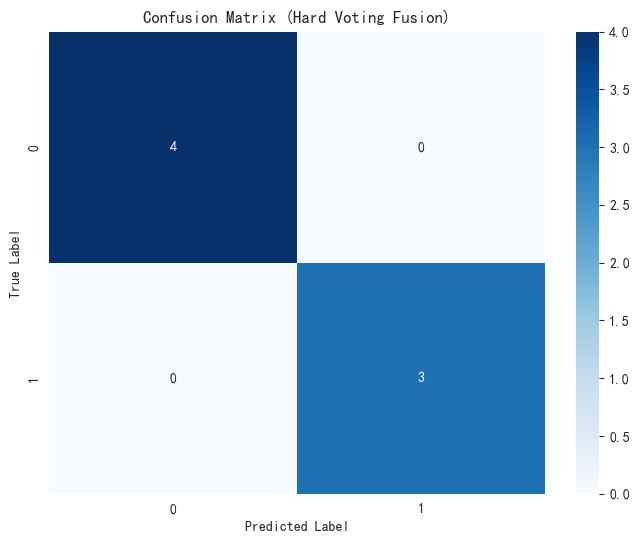

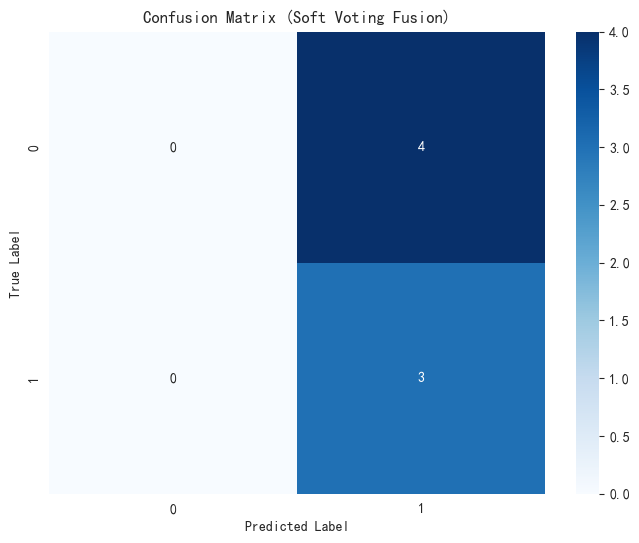

In [ ]:
import pandas as pd
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 读取基本特征数据和标签
data_path = './处理后的数据/附件1.xlsx'
df = pd.read_excel(data_path)

# 分离特征和标签
X_basic = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 读取脑电波数据
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = sorted([os.path.join(eeg_data_folder, f) for f in os.listdir(eeg_data_folder) if f.endswith('.csv')])

# 初始化一个空的列表来存储所有的时间序列数据
eeg_data = []

for file in eeg_files:
    eeg_df = pd.read_csv(file, encoding='latin1')  # 尝试不同的编码格式，如'latin1'或'gbk'
    eeg_data.append(eeg_df.iloc[:, 2:].values)

# 确保所有的时间序列数据形状一致（最短截断）
min_length = min([eeg.shape[0] for eeg in eeg_data])

# 截断所有时间序列数据以确保形状一致
eeg_data_truncated = []

for eeg in eeg_data:
    eeg_truncated = eeg[:min_length, :]
    eeg_data_truncated.append(eeg_truncated)

X_eeg = np.array(eeg_data_truncated)

# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, X_basic, X_eeg, y):
        self.X_basic = torch.tensor(X_basic, dtype=torch.float32)
        self.X_eeg = torch.tensor(X_eeg, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X_basic[idx], self.X_eeg[idx], self.y[idx]

# 创建数据集
dataset = CustomDataset(X_basic, X_eeg, y)

# 拆分数据集
train_size = int(0.65 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义基本特征模型
class BasicFeatureModel(nn.Module):
    def __init__(self, input_dim):
        super(BasicFeatureModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# 定义脑电波数据模型
class EEGModel(nn.Module):
    def __init__(self, input_dim, sequence_length):
        super(EEGModel, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, 64, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        conv_output_size = self._get_conv_output_size(sequence_length)
        self.fc1 = nn.Linear(conv_output_size, 32)
        self.fc2 = nn.Linear(32, 1)
    
    def _get_conv_output_size(self, sequence_length):
        # 计算卷积层后的输出大小
        def conv1d_size_out(size, kernel_size=3, stride=1, padding=0):
            return (size + 2 * padding - (kernel_size - 1) - 1) // stride + 1
        
        size = sequence_length
        size = conv1d_size_out(size, 3)
        size = size // 2  # maxpool1d
        size = conv1d_size_out(size, 3)
        size = size // 2  # maxpool1d
        return size * 128  # times the number of output channels
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

input_dim_basic = X_basic.shape[1]
input_dim_eeg = X_eeg.shape[2]
sequence_length = X_eeg.shape[1]

basic_model = BasicFeatureModel(input_dim_basic)
eeg_model = EEGModel(input_dim_eeg, sequence_length)

# 损失函数和优化器
criterion = nn.BCELoss()
optimizer_basic = optim.Adam(basic_model.parameters(), lr=0.001)
optimizer_eeg = optim.Adam(eeg_model.parameters(), lr=0.001)

num_epochs = 500

# 训练基本特征模型
for epoch in range(num_epochs):
    basic_model.train()
    running_loss = 0.0
    for X_basic_batch, _, y_batch in train_loader:
        optimizer_basic.zero_grad()
        outputs = basic_model(X_basic_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_basic.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Basic Model Loss: {running_loss/len(train_loader)}')

# 训练脑电波数据模型
for epoch in range(num_epochs):
    eeg_model.train()
    running_loss = 0.0
    for _, X_eeg_batch, y_batch in train_loader:
        X_eeg_batch = X_eeg_batch.permute(0, 2, 1)  # Change shape to (batch_size, channels, sequence_length)
        optimizer_eeg.zero_grad()
        outputs = eeg_model(X_eeg_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_eeg.step()
        running_loss += loss.item()
    # print(f'Epoch {epoch+1}, EEG Model Loss: {running_loss/len(train_loader)}')

# 晚期融合
basic_model.eval()
eeg_model.eval()

basic_preds = []
eeg_preds = []
true_labels = []

with torch.no_grad():
    for X_basic_batch, X_eeg_batch, y_batch in test_loader:
        basic_output = basic_model(X_basic_batch).squeeze().numpy()
        X_eeg_batch = X_eeg_batch.permute(0, 2, 1)
        eeg_output = eeg_model(X_eeg_batch).squeeze().numpy()
        
        basic_preds.extend(basic_output)
        eeg_preds.extend(eeg_output)
        true_labels.extend(y_batch.numpy())

# 转换为 numpy 数组
basic_preds = np.array(basic_preds)
eeg_preds = np.array(eeg_preds)
true_labels = np.array(true_labels)

# 将预测结果从概率转换为二进制标签
basic_preds_binary = (basic_preds > 0.5).astype(int)
eeg_preds_binary = (eeg_preds > 0.5).astype(int)

# 加权平均融合
fused_preds_weighted = (basic_preds + eeg_preds) / 2
fused_preds_weighted_binary = (fused_preds_weighted > 0.5).astype(int)

# 硬投票融合
fused_preds_hard = basic_preds_binary + eeg_preds_binary
fused_preds_hard = (fused_preds_hard > 1).astype(int)

# 软投票融合
fused_preds_soft = (basic_preds + eeg_preds) / 2
fused_preds_soft_binary = (fused_preds_soft > 0.5).astype(int)

# 计算准确率和生成报告
def evaluate_fusion(true_labels, fused_preds_binary, method):
    accuracy = accuracy_score(true_labels, fused_preds_binary)
    conf_matrix = confusion_matrix(true_labels, fused_preds_binary)
    class_report = classification_report(true_labels, fused_preds_binary)
    print(f"{method} Fusion Model Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    return accuracy, conf_matrix, class_report

# 加权平均融合结果
_, conf_matrix_weighted, _ = evaluate_fusion(true_labels, fused_preds_weighted_binary, "Weighted Average")

# 硬投票融合结果
_, conf_matrix_hard, _ = evaluate_fusion(true_labels, fused_preds_hard, "Hard Voting")

# 软投票融合结果
_, conf_matrix_soft, _ = evaluate_fusion(true_labels, fused_preds_soft_binary, "Soft Voting")

# 绘制混淆矩阵
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# 绘制加权平均融合的混淆矩阵
plot_confusion_matrix(conf_matrix_weighted, "MLP+CNN Confusion Matrix ")

# 绘制硬投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_hard, "Confusion Matrix (Hard Voting Fusion)")

# 绘制软投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_soft, "Confusion Matrix (Soft Voting Fusion)")


In [ ]:
random+GRU

Weighted Average Fusion Model Accuracy: 0.7142857142857143
Confusion Matrix:
[[3 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7

Hard Voting Fusion Model Accuracy: 0.8571428571428571
Confusion Matrix:
[[4 0]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

Soft Voting Fusion Model Accuracy: 0.7142857142857143
Confusion Matrix:
[[3 1]
 [1 2]]

Classification Report:
        

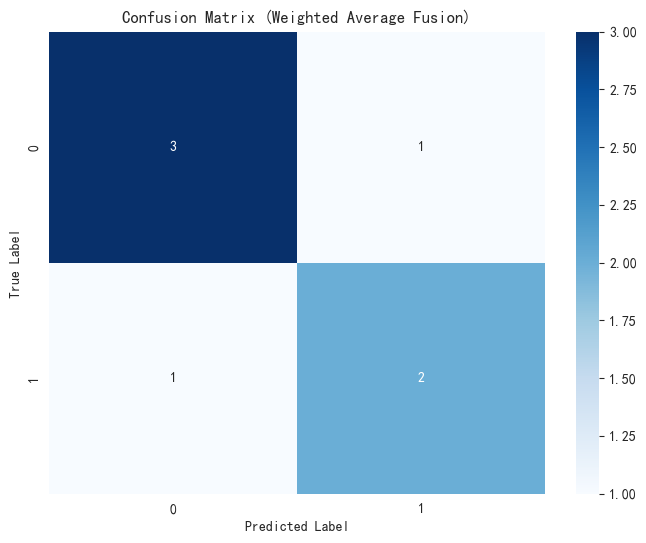

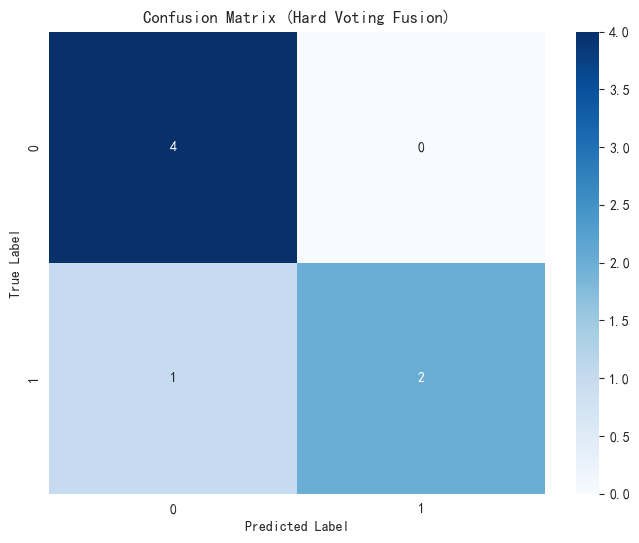

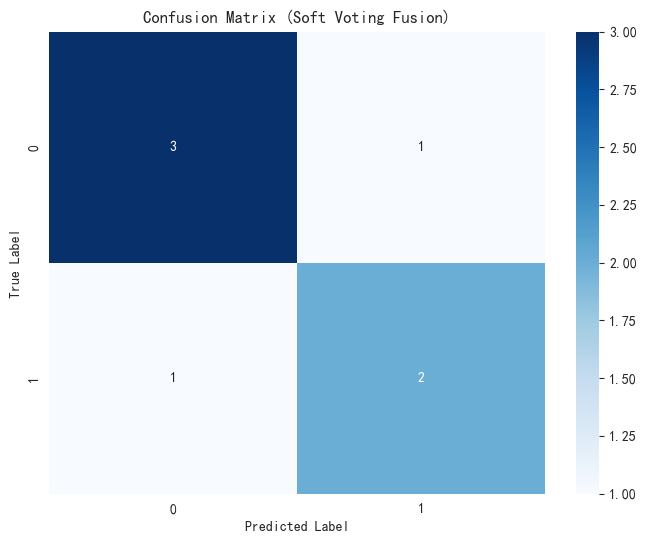

In [ ]:
import pandas as pd
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 读取基本特征数据和标签
data_path = './处理后的数据/附件1.xlsx'
df = pd.read_excel(data_path)

# 分离特征和标签
X_basic = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 读取脑电波数据
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = sorted([os.path.join(eeg_data_folder, f) for f in os.listdir(eeg_data_folder) if f.endswith('.csv')])

# 初始化一个空的列表来存储所有的时间序列数据
eeg_data = []

for file in eeg_files:
    eeg_df = pd.read_csv(file, encoding='latin1')  # 尝试不同的编码格式，如'latin1'或'gbk'
    eeg_data.append(eeg_df.iloc[:, 2:].values)

# 确保所有的时间序列数据形状一致（最短截断）
min_length = min([eeg.shape[0] for eeg in eeg_data])

# 截断所有时间序列数据以确保形状一致
eeg_data_truncated = []

for eeg in eeg_data:
    eeg_truncated = eeg[:min_length, :]
    eeg_data_truncated.append(eeg_truncated)

X_eeg = np.array(eeg_data_truncated)

# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, X_basic, X_eeg, y):
        self.X_basic = torch.tensor(X_basic, dtype=torch.float32)
        self.X_eeg = torch.tensor(X_eeg, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X_basic[idx], self.X_eeg[idx], self.y[idx]

# 创建数据集
dataset = CustomDataset(X_basic, X_eeg, y)

# 拆分数据集
train_size = int(0.65 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义GRU模型
class EEGModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers):
        super(EEGModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(self.gru.num_layers, x.size(0), self.gru.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        out = torch.sigmoid(out)
        return out

input_dim_eeg = X_eeg.shape[2]
hidden_dim = 128
output_dim = 1
n_layers = 2

eeg_model = EEGModel(input_dim_eeg, hidden_dim, output_dim, n_layers)

# 损失函数和优化器
criterion = nn.BCELoss()
optimizer_eeg = optim.Adam(eeg_model.parameters(), lr=0.001)

num_epochs = 500

# 训练GRU模型
for epoch in range(num_epochs):
    eeg_model.train()
    running_loss = 0.0
    for _, X_eeg_batch, y_batch in train_loader:
        optimizer_eeg.zero_grad()
        outputs = eeg_model(X_eeg_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_eeg.step()
        running_loss += loss.item()
    # print(f'Epoch {epoch+1}, EEG Model Loss: {running_loss/len(train_loader)}')

# 训练随机森林模型
X_basic_train = []
y_train = []
for X_basic_batch, _, y_batch in train_loader:
    X_basic_train.extend(X_basic_batch.numpy())
    y_train.extend(y_batch.numpy())

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_basic_train, y_train)

# 晚期融合
eeg_model.eval()

basic_preds = []
eeg_preds = []
true_labels = []

with torch.no_grad():
    for X_basic_batch, X_eeg_batch, y_batch in test_loader:
        eeg_output = eeg_model(X_eeg_batch).squeeze().numpy()
        basic_output = rf_model.predict_proba(X_basic_batch)[:, 1]
        
        basic_preds.extend(basic_output)
        eeg_preds.extend(eeg_output)
        true_labels.extend(y_batch.numpy())

# 转换为 numpy 数组
basic_preds = np.array(basic_preds)
eeg_preds = np.array(eeg_preds)
true_labels = np.array(true_labels)

# 将预测结果从概率转换为二进制标签
basic_preds_binary = (basic_preds > 0.5).astype(int)
eeg_preds_binary = (eeg_preds > 0.5).astype(int)

# 加权平均融合
fused_preds_weighted = (basic_preds + eeg_preds) / 2
fused_preds_weighted_binary = (fused_preds_weighted > 0.5).astype(int)

# 硬投票融合
fused_preds_hard = basic_preds_binary + eeg_preds_binary
fused_preds_hard = (fused_preds_hard > 1).astype(int)

# 软投票融合
fused_preds_soft = (basic_preds + eeg_preds) / 2
fused_preds_soft_binary = (fused_preds_soft > 0.5).astype(int)

# 计算准确率和生成报告
def evaluate_fusion(true_labels, fused_preds_binary, method):
    accuracy = accuracy_score(true_labels, fused_preds_binary)
    conf_matrix = confusion_matrix(true_labels, fused_preds_binary)
    class_report = classification_report(true_labels, fused_preds_binary)
    print(f"{method} Fusion Model Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    return accuracy, conf_matrix, class_report

# 加权平均融合结果
_, conf_matrix_weighted, _ = evaluate_fusion(true_labels, fused_preds_weighted_binary, "Weighted Average")

# 硬投票融合结果
_, conf_matrix_hard, _ = evaluate_fusion(true_labels, fused_preds_hard, "Hard Voting")

# 软投票融合结果
_, conf_matrix_soft, _ = evaluate_fusion(true_labels, fused_preds_soft_binary, "Soft Voting")

# 绘制混淆矩阵
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# 绘制加权平均融合的混淆矩阵
plot_confusion_matrix(conf_matrix_weighted, "Confusion Matrix (Weighted Average Fusion)")

# 绘制硬投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_hard, "Confusion Matrix (Hard Voting Fusion)")

# 绘制软投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_soft, "Confusion Matrix (Soft Voting Fusion)")


random+cnn

Weighted Average Fusion Model Accuracy: 0.2857142857142857
Confusion Matrix:
[[1 4]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.20      0.50      0.29         2

    accuracy                           0.29         7
   macro avg       0.35      0.35      0.29         7
weighted avg       0.41      0.29      0.29         7

Hard Voting Fusion Model Accuracy: 0.8571428571428571
Confusion Matrix:
[[5 0]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7

Soft Voting Fusion Model Accuracy: 0.2857142857142857
Confusion Matrix:
[[1 4]
 [1 1]]

Classification Report:
        

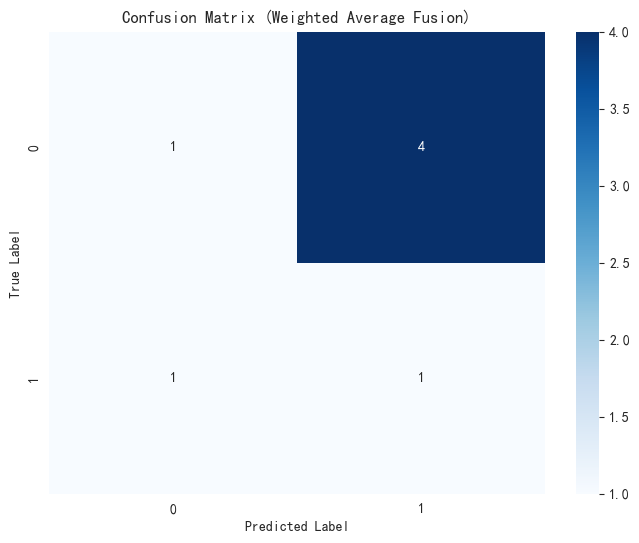

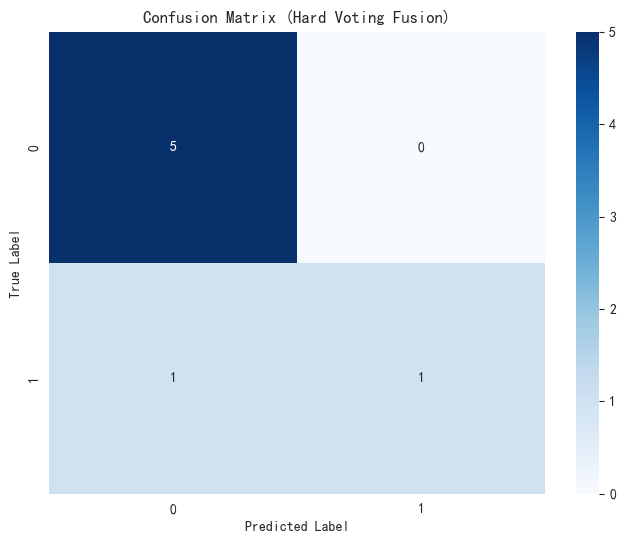

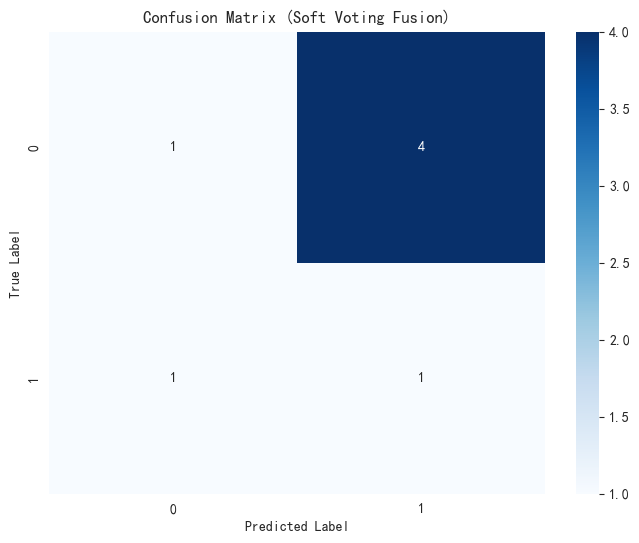

In [ ]:
import pandas as pd
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 读取基本特征数据和标签
data_path = './处理后的数据/附件1.xlsx'
df = pd.read_excel(data_path)

# 分离特征和标签
X_basic = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 读取脑电波数据
eeg_data_folder = './处理后的数据/脑电波数据1'
eeg_files = sorted([os.path.join(eeg_data_folder, f) for f in os.listdir(eeg_data_folder) if f.endswith('.csv')])

# 初始化一个空的列表来存储所有的时间序列数据
eeg_data = []

for file in eeg_files:
    eeg_df = pd.read_csv(file, encoding='latin1')  # 尝试不同的编码格式，如'latin1'或'gbk'
    eeg_data.append(eeg_df.iloc[:, 2:].values)

# 确保所有的时间序列数据形状一致（最短截断）
min_length = min([eeg.shape[0] for eeg in eeg_data])

# 截断所有时间序列数据以确保形状一致
eeg_data_truncated = []

for eeg in eeg_data:
    eeg_truncated = eeg[:min_length, :]
    eeg_data_truncated.append(eeg_truncated)

X_eeg = np.array(eeg_data_truncated)

# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, X_basic, X_eeg, y):
        self.X_basic = torch.tensor(X_basic, dtype=torch.float32)
        self.X_eeg = torch.tensor(X_eeg, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X_basic[idx], self.X_eeg[idx], self.y[idx]

# 创建数据集
dataset = CustomDataset(X_basic, X_eeg, y)

# 拆分数据集
train_size = int(0.65 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义CNN模型
class EEGModel(nn.Module):
    def __init__(self, input_dim, sequence_length):
        super(EEGModel, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, 64, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        conv_output_size = self._get_conv_output_size(sequence_length)
        self.fc1 = nn.Linear(conv_output_size, 32)
        self.fc2 = nn.Linear(32, 1)
    
    def _get_conv_output_size(self, sequence_length):
        # 计算卷积层后的输出大小
        def conv1d_size_out(size, kernel_size=3, stride=1, padding=0):
            return (size + 2 * padding - (kernel_size - 1) - 1) // stride + 1
        
        size = sequence_length
        size = conv1d_size_out(size, 3)
        size = size // 2  # maxpool1d
        size = conv1d_size_out(size, 3)
        size = size // 2  # maxpool1d
        return size * 128  # times the number of output channels
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

input_dim_eeg = X_eeg.shape[2]
sequence_length = X_eeg.shape[1]

eeg_model = EEGModel(input_dim_eeg, sequence_length)

# 损失函数和优化器
criterion = nn.BCELoss()
optimizer_eeg = optim.Adam(eeg_model.parameters(), lr=0.001)

num_epochs = 500

# 训练CNN模型
for epoch in range(num_epochs):
    eeg_model.train()
    running_loss = 0.0
    for _, X_eeg_batch, y_batch in train_loader:
        X_eeg_batch = X_eeg_batch.permute(0, 2, 1)  # Change shape to (batch_size, channels, sequence_length)
        optimizer_eeg.zero_grad()
        outputs = eeg_model(X_eeg_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer_eeg.step()
        running_loss += loss.item()
    # print(f'Epoch {epoch+1}, EEG Model Loss: {running_loss/len(train_loader)}')

# 训练随机森林模型
X_basic_train = []
y_train = []
for X_basic_batch, _, y_batch in train_loader:
    X_basic_train.extend(X_basic_batch.numpy())
    y_train.extend(y_batch.numpy())

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_basic_train, y_train)

# 晚期融合
eeg_model.eval()

basic_preds = []
eeg_preds = []
true_labels = []

with torch.no_grad():
    for X_basic_batch, X_eeg_batch, y_batch in test_loader:
        X_eeg_batch = X_eeg_batch.permute(0, 2, 1)
        eeg_output = eeg_model(X_eeg_batch).squeeze().numpy()
        basic_output = rf_model.predict_proba(X_basic_batch)[:, 1]
        
        basic_preds.extend(basic_output)
        eeg_preds.extend(eeg_output)
        true_labels.extend(y_batch.numpy())

# 转换为 numpy 数组
basic_preds = np.array(basic_preds)
eeg_preds = np.array(eeg_preds)
true_labels = np.array(true_labels)

# 将预测结果从概率转换为二进制标签
basic_preds_binary = (basic_preds > 0.5).astype(int)
eeg_preds_binary = (eeg_preds > 0.5).astype(int)

# 加权平均融合
fused_preds_weighted = (basic_preds + eeg_preds) / 2
fused_preds_weighted_binary = (fused_preds_weighted > 0.5).astype(int)

# 硬投票融合
fused_preds_hard = basic_preds_binary + eeg_preds_binary
fused_preds_hard = (fused_preds_hard > 1).astype(int)

# 软投票融合
fused_preds_soft = (basic_preds + eeg_preds) / 2
fused_preds_soft_binary = (fused_preds_soft > 0.5).astype(int)

# 计算准确率和生成报告
def evaluate_fusion(true_labels, fused_preds_binary, method):
    accuracy = accuracy_score(true_labels, fused_preds_binary)
    conf_matrix = confusion_matrix(true_labels, fused_preds_binary)
    class_report = classification_report(true_labels, fused_preds_binary)
    print(f"{method} Fusion Model Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    return accuracy, conf_matrix, class_report

# 加权平均融合结果
_, conf_matrix_weighted, _ = evaluate_fusion(true_labels, fused_preds_weighted_binary, "Weighted Average")

# 硬投票融合结果
_, conf_matrix_hard, _ = evaluate_fusion(true_labels, fused_preds_hard, "Hard Voting")

# 软投票融合结果
_, conf_matrix_soft, _ = evaluate_fusion(true_labels, fused_preds_soft_binary, "Soft Voting")

# 绘制混淆矩阵
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# 绘制加权平均融合的混淆矩阵
plot_confusion_matrix(conf_matrix_weighted, "Confusion Matrix (Weighted Average Fusion)")

# 绘制硬投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_hard, "Confusion Matrix (Hard Voting Fusion)")

# 绘制软投票融合的混淆矩阵
plot_confusion_matrix(conf_matrix_soft, "Confusion Matrix (Soft Voting Fusion)")
